## Necessary libraries 

In [1]:
import pandas as pd #for reading and working with data
import matplotlib.pyplot as plt #for visuals
import seaborn as sns #for visuals
import numpy as np #for doing math/stat calculations, working with arrays
from pandas_datareader import data #for downloading data from Yahoo Finance website

from plotly.offline import iplot
from plotly.offline import init_notebook_mode
import plotly.graph_objects as go #the basic charts that we will use are mainly stored under graph_objs
init_notebook_mode(connected=True) #if we want the charts to be displayed in JN
import plotly.express as px
from tabulate import tabulate
from sklearn.cluster import KMeans 
from sklearn.manifold import TSNE
from statistics import *
from sklearn import metrics

In [2]:
from sklearn.linear_model import Ridge, Lasso

In [3]:
#imports for the Linear Regression

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from statsmodels.formula.api import ols #for linear regression
import seaborn as sns #for heatmap
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import r2_score #R-squared
from sklearn.model_selection import train_test_split #for train and test split
from statsmodels.api import qqplot 
from scipy.stats import shapiro,ttest_ind
from statsmodels.stats.diagnostic import het_breuschpagan,linear_rainbow  
from sklearn import linear_model

In [4]:
# imports for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
# imports for the Regression Tree
#libraries for modelling and evaluation
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
import scikitplot as skplt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [6]:
# imports for the Regression Tree other methods

from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [7]:
from six import StringIO

from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

from pydotplus import graph_from_dot_data

In [8]:
# imports for the Regression Tree graphical view
import graphviz

In [9]:
from yellowbrick.cluster import KElbowVisualizer

In [10]:
# Imports for visualizing Regression Tree
from IPython.display import Image  
import pydotplus

### Choosing palette

In [11]:
pal = "cool"

## Reading Data

In [12]:
data = pd.read_csv('C_Data.csv')
data.head(2)

Name State  AllPoverty_Perc  0_17_Poverty_Perc  Unemployement_17  \
0  Alameda    CA              8.6                9.1               3.7   
1   Alpine    CA             14.3               24.5               6.2   

   Unemployement_18  Unemployement_19  Unemployement_20  Unemployement_21  \
0               3.1               3.0               9.0               6.1   
1               4.6               5.2              11.7               8.1   

   MedianHouseholdIncome2020  ... race_asian  race_native  race_pacific  \
0                     113518  ...  26.876596     0.629787       0.72766   
1                      64542  ...   3.400000    19.050000       0.30000   

   race_other race_multiple   hispanic  disabled  median_rent_paid  Metro  \
0    9.095745      6.689362  19.582979   9.42766           33600.9      1   
1    5.650000      2.850000  19.600000  10.90000           21609.9      0   

  Avg_home_price_2021  
0           1088290.8  
1            469876.1  

[2 rows x 102 columns]

## Data cleaning and understanding trends

In [13]:
data.shape

(351, 102)

In [14]:
data.describe()

AllPoverty_Perc  0_17_Poverty_Perc  Unemployement_17  Unemployement_18  \
count       351.000000         351.000000        351.000000        351.000000   
mean         13.878063          19.423932          4.918519          4.319658   
std           4.271962           7.245467          1.909308          1.761586   
min           3.900000           5.600000          1.900000          1.500000   
25%          10.700000          14.550000          3.650000          3.200000   
50%          13.600000          18.800000          4.400000          3.900000   
75%          16.800000          23.750000          5.600000          5.000000   
max          28.700000          59.700000         19.700000         18.900000   

       Unemployement_19  Unemployement_20  Unemployement_21  \
count        351.000000        351.000000        351.000000   
mean           4.056980          7.514815          5.938177   
std            1.806734          2.606170          2.008047   
min            0.800000          1.700000          0.900000   
25%            3.000000          5.700000          4.650000   
50%            3.600000          7.200000          5.600000   
75%            4.700000          8.900000          6.700000   
max           20.900000         22.800000         17.300000   

       MedianHouseholdIncome2020       Pop2010       Pop2020  ...  race_asian  \
count                 351.000000  3.510000e+02  3.510000e+02  ...  351.000000   
mean                60903.800570  1.969346e+05  2.176325e+05  ...    1.932190   
std                 16074.426787  6.852870e+05  7.291720e+05  ...    4.167417   
min                 33513.000000  8.200000e+01  6.400000e+01  ...    0.000000   
25%                 50011.500000  9.143000e+03  8.657500e+03  ...    0.200000   
50%                 57212.000000  2.544800e+04  2.475400e+04  ...    0.650000   
75%                 66502.500000  9.365100e+04  1.010985e+05  ...    1.538571   
max                139462.000000  9.818605e+06  1.001401e+07  ...   34.481481   

       race_native  race_pacific  race_other  race_multiple    hispanic  \
count   351.000000    351.000000  351.000000     351.000000  351.000000   
mean      1.205580      0.119030    5.633980       2.792501   29.070388   
std       2.429300      0.214950    7.800439       2.328515   22.217938   
min       0.000000      0.000000    0.000000       0.000000    1.900000   
25%       0.205556      0.000000    1.358502       1.350000   12.200000   
50%       0.571429      0.028571    2.811111       2.400000   21.900000   
75%       1.035812      0.133333    6.650427       3.653947   40.659558   
max      23.188889      1.650000   56.500000      25.000000   99.740000   

         disabled  median_rent_paid       Metro  Avg_home_price_2021  
count  351.000000        351.000000  351.000000         3.510000e+02  
mean    16.398365      16824.016239    0.396011         2.679047e+05  
std      4.996828       6307.661323    0.489765         2.189029e+05  
min      2.400000       6349.300000    0.000000         5.362930e+04  
25%     13.058571      12513.150000    0.000000         1.449361e+05  
50%     16.166667      15204.500000    0.000000         1.772357e+05  
75%     19.641429      19454.400000    1.000000         3.215212e+05  
max     40.000000      44065.700000    1.000000         1.564374e+06  

[8 rows x 78 columns]

In [15]:
nulls = data.isnull().sum()
nulls = nulls[nulls > 0]
nulls

Avalanche_ExpAnnLoss       295
Avalanche_HazTypeRisk      295
Hurricane_ExpAnnLoss       105
Hurricane_HazTypeRisk      105
Tsunami_ExpAnnLoss         316
Tsunami_HazTypeRisk        316
VolcanicAct_ExpAnnLoss     309
VolcanicAct_HazTypeRisk    309
dtype: int64

In [16]:
print("Overall, the sum of missing values of the dataset is:", data.isnull().sum().sum())

Overall, the sum of missing values of the dataset is: 2050


In [17]:
print('Duplicates:', data.duplicated().sum())

Duplicates: 0


### Data Cleaning: 

#### 1. Making all env missing values 0s

In [18]:
data["Avalanche_ExpAnnLoss"] = data["Avalanche_ExpAnnLoss"].fillna(0)
data["Avalanche_HazTypeRisk"] = data["Avalanche_HazTypeRisk"].fillna(0)
data["Hurricane_ExpAnnLoss"] = data["Hurricane_ExpAnnLoss"].fillna(0)
data["Hurricane_HazTypeRisk"] = data["Hurricane_HazTypeRisk"].fillna(0)
data["Tsunami_ExpAnnLoss"] = data["Tsunami_ExpAnnLoss"].fillna(0)
data["Tsunami_HazTypeRisk"] = data["Tsunami_HazTypeRisk"].fillna(0)
data["VolcanicAct_ExpAnnLoss"] = data["VolcanicAct_ExpAnnLoss"].fillna(0)
data["VolcanicAct_HazTypeRisk"] = data["VolcanicAct_HazTypeRisk"].fillna(0)

#### 2. Replace all spaces into "_" , make all strings lowercase

In [19]:
data = data.replace(" ", "_")

In [20]:
data.columns = data.columns.str.lower()

#### 3. Deleting % marks

In [21]:
data['hhmedianperc'] = data['hhmedianperc'].apply(lambda x: x.replace('%', '')).astype(float)
data['change2010-20'] = data['change2010-20'].apply(lambda x: x.replace('%', '')).astype(float)
data['change2020-21'] = data['change2020-21'].apply(lambda x: x.replace('%', '')).astype(float)

In [22]:
data.columns

Index(['name', 'state', 'allpoverty_perc', '0_17_poverty_perc',
       'unemployement_17', 'unemployement_18', 'unemployement_19',
       'unemployement_20', 'unemployement_21', 'medianhouseholdincome2020',
       ...
       'race_asian', 'race_native', 'race_pacific', 'race_other',
       'race_multiple', 'hispanic', 'disabled', 'median_rent_paid', 'metro',
       'avg_home_price_2021'],
      dtype='object', length=102)

#### 4. Dropping education

In [23]:
data = data.drop(["education_less_highschool", "education_highschool", "education_some_college", "education_bachelors", 
                  "education_graduate"], axis=1)

In [24]:
data = data.drop("hhmedianperc", axis=1)

### Numerics and Objects

### Final check for nulls


In [25]:
nulls = data.isnull().sum()
nulls = nulls[nulls > 0]
nulls

Series([], dtype: int64)

In [26]:
data.head(2)

name state  allpoverty_perc  0_17_poverty_perc  unemployement_17  \
0  Alameda    CA              8.6                9.1               3.7   
1   Alpine    CA             14.3               24.5               6.2   

   unemployement_18  unemployement_19  unemployement_20  unemployement_21  \
0               3.1               3.0               9.0               6.1   
1               4.6               5.2              11.7               8.1   

   medianhouseholdincome2020  ...  race_asian  race_native  race_pacific  \
0                     113518  ...   26.876596     0.629787       0.72766   
1                      64542  ...    3.400000    19.050000       0.30000   

   race_other  race_multiple   hispanic  disabled  median_rent_paid metro  \
0    9.095745       6.689362  19.582979   9.42766           33600.9     1   
1    5.650000       2.850000  19.600000  10.90000           21609.9     0   

  avg_home_price_2021  
0           1088290.8  
1            469876.1  

[2 rows x 96 columns]

### Understanding the demographic data

#### 1. Availability of Metro

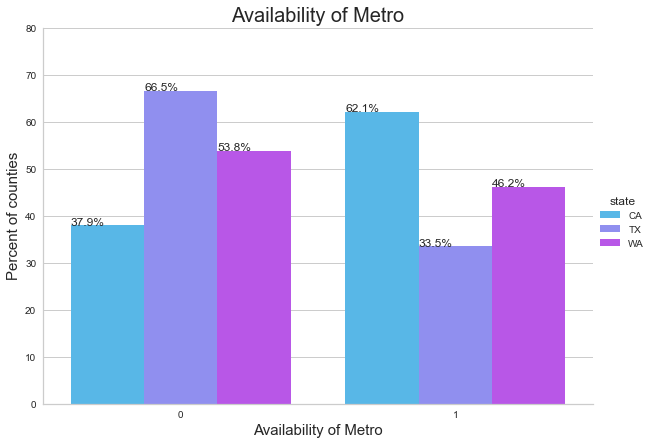

In [27]:
x,y = 'state', 'metro'

df1 = data.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=y,y='percent',hue=x,kind='bar',data=df1, palette = pal, height=6, aspect=1.4)
g.ax.set_ylim(0,80)
plt.title("Availability of Metro", fontsize=20)
plt.xticks(size=10)
plt.xlabel("Availability of Metro",fontsize=15)
plt.ylabel("Percent of counties",fontsize=15)

for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

#### 2. Correlation between Average Home price and demographic variables

In [28]:
ccc = ["medianhouseholdincome2020", "median_rent_paid", "pop2021", "risk_score", "socialvulnerability_score", 
      "density", "age_median", "family_size", "family_dual_income", "income_household_median", "home_ownership", 
      "rent_burden", "disabled", "median_rent_paid"]

In [29]:
color_everywhere = '#3D59AB'

In [30]:
line_color = "darkblue"

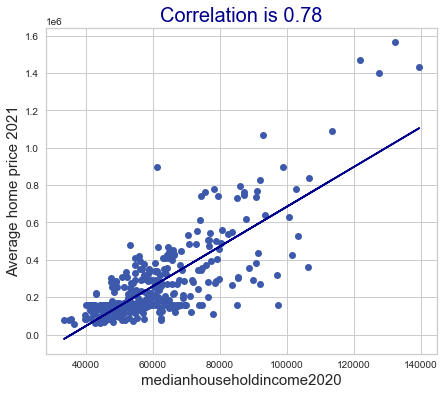

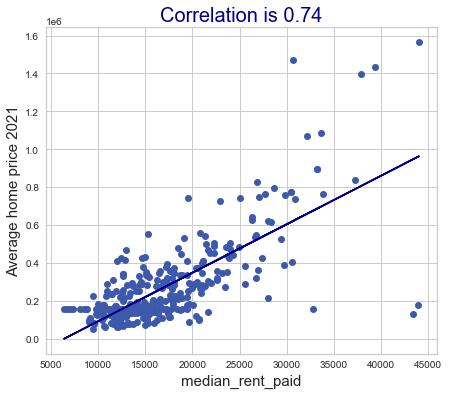

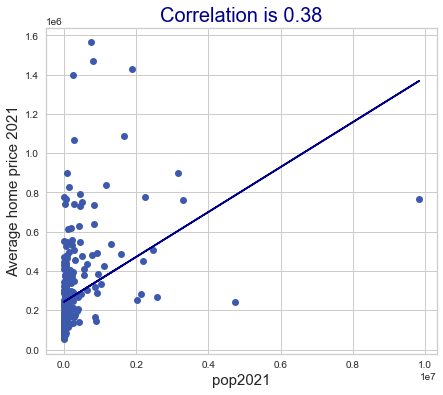

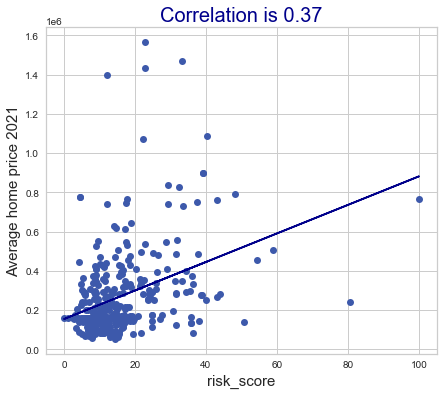

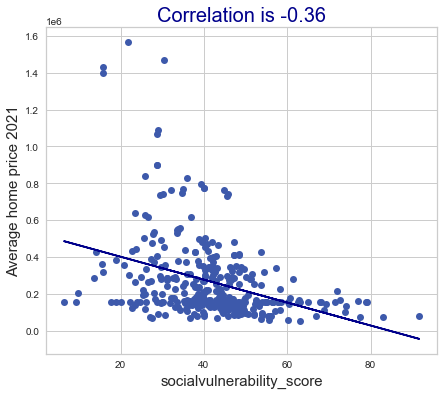

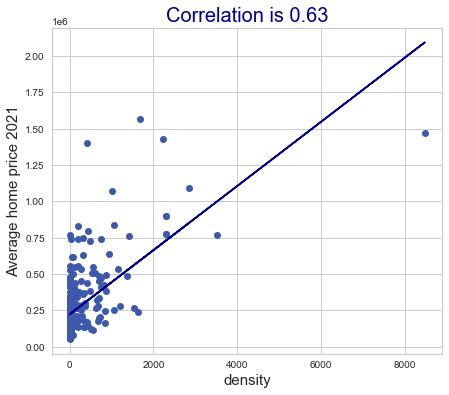

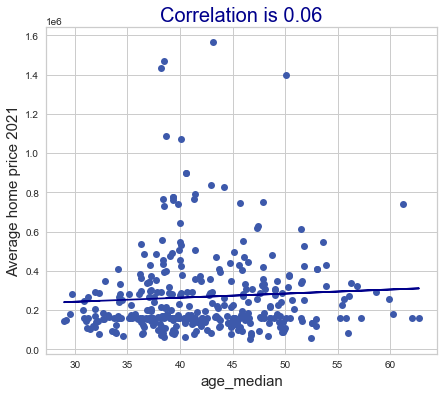

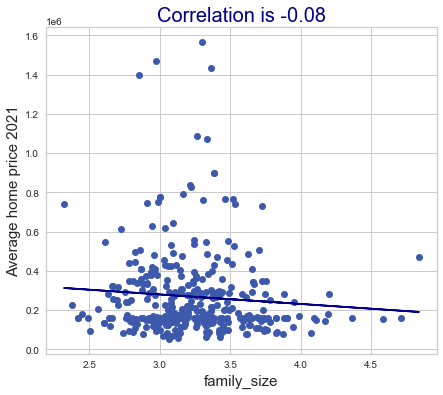

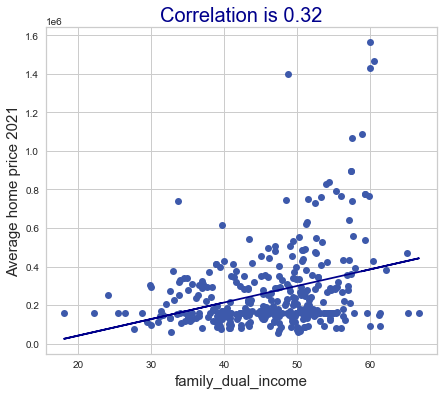

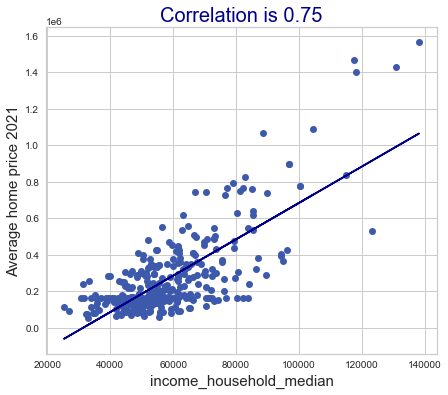

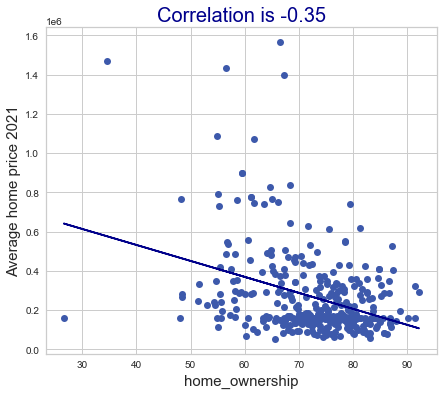

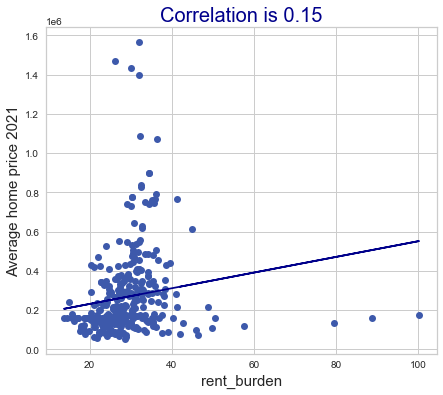

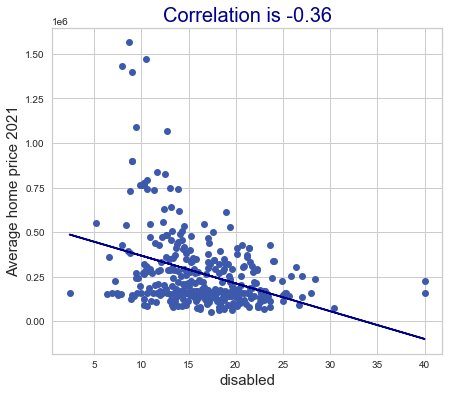

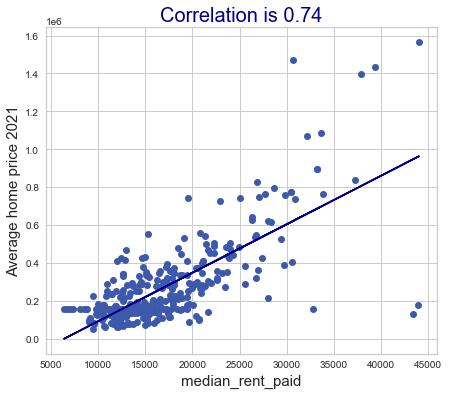

In [31]:
for i in ccc: 
    plt.figure(figsize = (7,6))
    x=data[i]
    y=data["avg_home_price_2021"]
    plt.plot(x, y, 'o', color = color_everywhere)
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color=line_color)
    plt.title(f"Correlation is {data.avg_home_price_2021.corr(data[i]).round(2)}", fontsize = 20, color = 'darkblue')
    plt.xlabel(i, fontsize=15)
    plt.ylabel("Average home price 2021", fontsize=15)

    plt.show()

In [32]:
ccc_data = pd.DataFrame()
for i in ccc: 
    ccc_data[i] = data[i]

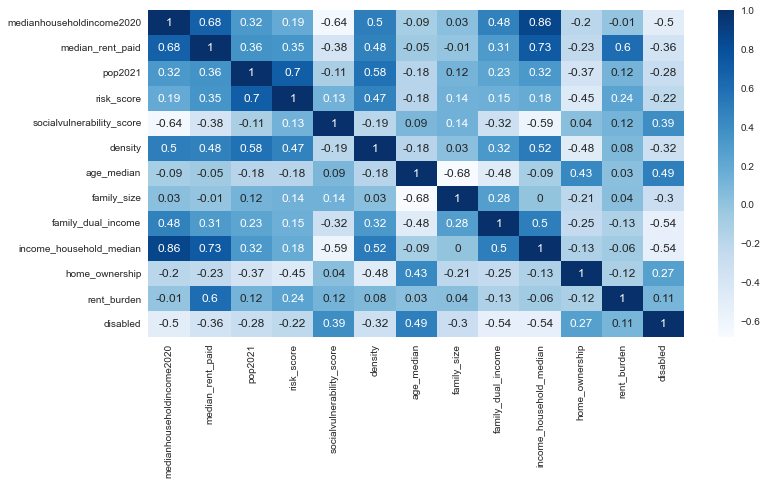

In [33]:
plt.figure(figsize = (12,6))
sns.heatmap(ccc_data.corr().round(2),annot=True, cmap = "Blues")
plt.show()

#### 3. State-by-state changes in variables

In [34]:
data_numeric = data.select_dtypes(include='number')
data_object = data.select_dtypes(exclude='number')

In [35]:
data_object.iloc[:, 1:5].columns

Index(['state', 'risk_ratng', 'expannualloss_ratng',
       'socialvulnerability_ratng'],
      dtype='object')

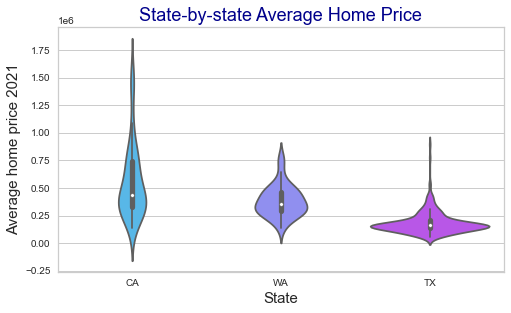

In [36]:
plt.figure(figsize = (8,4.5))
sns.violinplot(data=data, x="state", y="avg_home_price_2021", showmeans=True, palette=pal)

plt.title("State-by-state Average Home Price", fontsize = 18, color = 'darkblue')
plt.xlabel("State", fontsize=15)
plt.ylabel("Average home price 2021", fontsize=15)
plt.show()

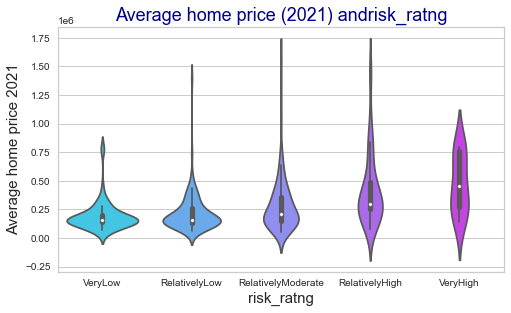

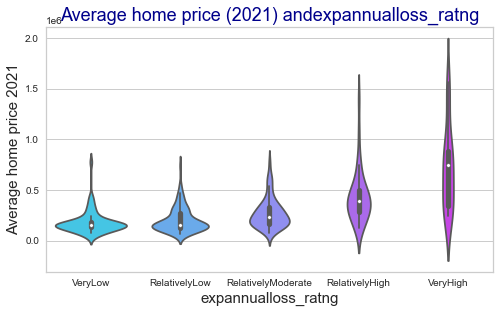

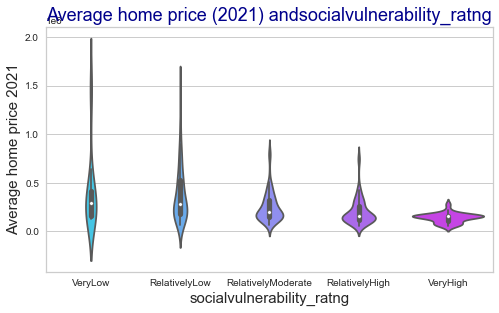

In [37]:
for i in data_object.iloc[:, 2:5].columns:
    plt.figure(figsize = (8,4.5))
    sns.violinplot(data=data, x=i, y="avg_home_price_2021", showmeans=True, palette=pal, order = ["VeryLow", "RelativelyLow", "RelativelyModerate", "RelativelyHigh", "VeryHigh"])
    plt.title(f"Average home price (2021) and{i}", fontsize = 18, color = 'darkblue')
    plt.xlabel(i, fontsize=15)
    plt.ylabel("Average home price 2021", fontsize=15)
    plt.show()

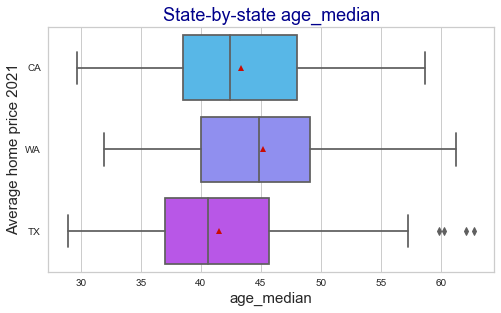

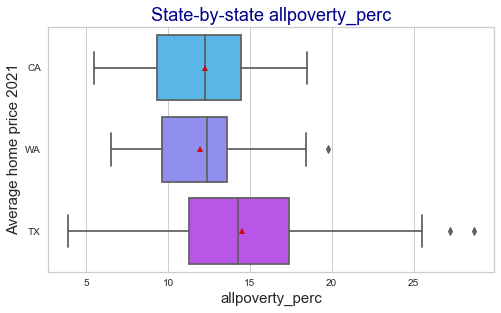

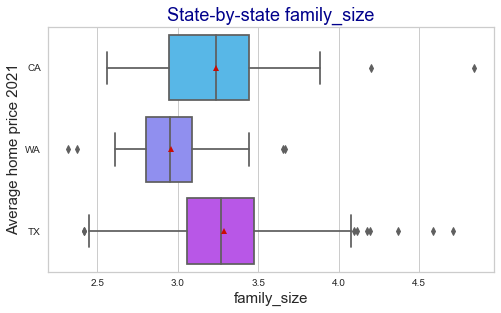

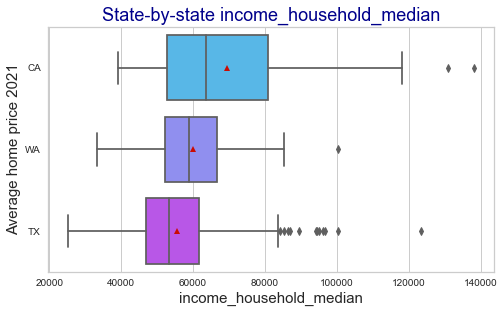

In [38]:
x_var = ["age_median", "allpoverty_perc", "family_size", "income_household_median"]

for i in x_var:
    plt.figure(figsize = (8,4.5))
    sns.boxplot(data=data, x=i, y="state", showmeans=True, palette=pal)
    
    plt.title(f"State-by-state {i}", fontsize = 18, color = 'darkblue')
    plt.xlabel(i, fontsize=15)
    plt.ylabel("Average home price 2021", fontsize=15)    
    
    plt.show()

#### 4. County level analysis for Average home price

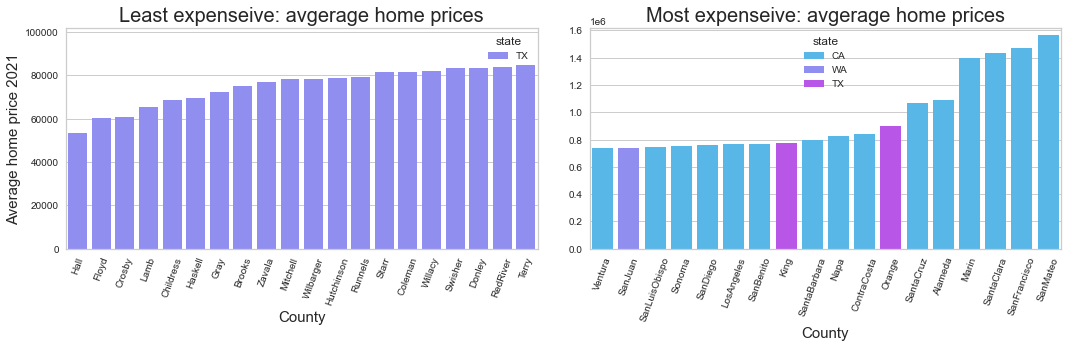

In [39]:
# grouping data
home_price = data.groupby(["name", "state"]).agg({'avg_home_price_2021': "mean"})
home_price = home_price.sort_values("avg_home_price_2021")
home_price.reset_index(inplace=True)


# plots
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
sns.barplot(x='name',y='avg_home_price_2021', hue='state', data=home_price.head(20), dodge=False, 
            palette = pal).set_title('Least expenseive: avgerage home prices', fontsize = 20)
#plt.title(fontsize = 18, color = 'darkblue')
plt.xlabel("County", fontsize=15)
plt.ylabel("Average home price 2021", fontsize=15)    
plt.xticks(rotation=70)
plt.ylim([0,102000])
plt.tight_layout()


plt.subplot(1, 2, 2) # index 2
sns.barplot(x='name',y='avg_home_price_2021', hue='state', data=home_price.tail(20), dodge=False, 
            palette = pal).set_title('Most expenseive: avgerage home prices',  fontsize = 20)
plt.xlabel("County", fontsize=15)
plt.ylabel(" ", fontsize=15)    
plt.xticks(rotation=70)
plt.ylim([0,1620000])
plt.tight_layout()


#### 5. County level analysis for Median Hosehold Income

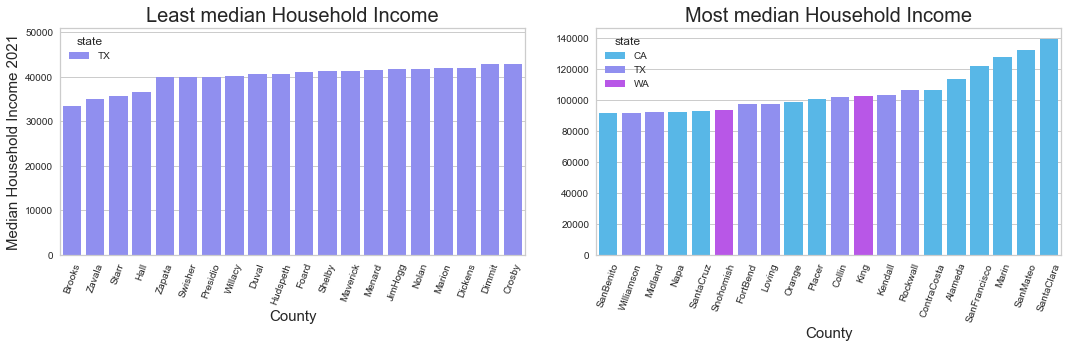

In [40]:
# grouping data
hhinc = data.groupby(["name", "state"]).agg({'medianhouseholdincome2020': "mean"})
hhinc = hhinc.sort_values("medianhouseholdincome2020")
hhinc.reset_index(inplace=True)


# plots
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
sns.barplot(x='name',y='medianhouseholdincome2020', hue='state', data=hhinc.head(20), dodge=False, 
            palette = pal).set_title('Least median Household Income', fontsize = 20)
plt.xlabel("County", fontsize=15)
plt.ylabel("Median Household Income 2021", fontsize=15)    
plt.xticks(rotation=70)
plt.ylim([0,51000])
plt.tight_layout()

plt.subplot(1, 2, 2) # index 2
sns.barplot(x='name',y='medianhouseholdincome2020', hue='state', data=hhinc.tail(20), dodge=False, 
            palette = pal).set_title('Most median Household Income', fontsize = 20)
plt.xlabel("County", fontsize=15)
plt.ylabel(" ", fontsize=15)    
plt.xticks(rotation=70)
plt.tight_layout()


#### 6. Age Distribution

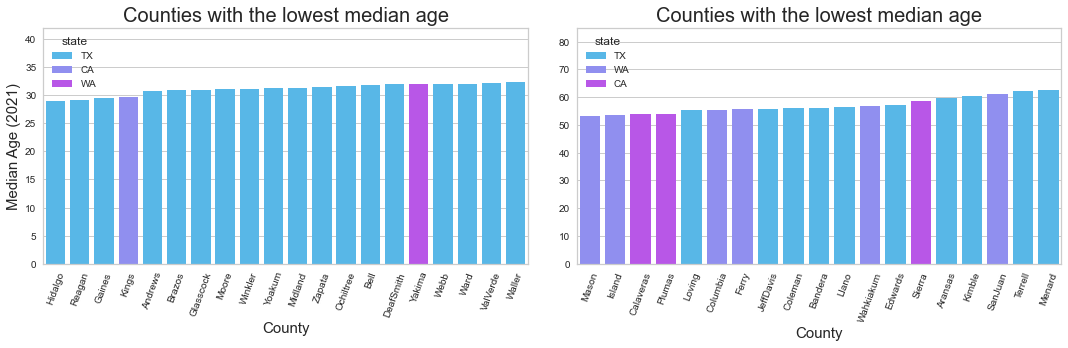

In [41]:
age_median_sorted1 = data.groupby(["name", "state"]).agg({'age_median': "mean"})
age_median_sorted1 = age_median_sorted1.sort_values("age_median")
age_median_sorted1.reset_index(inplace=True)

# plots
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
sns.barplot(x='name',y='age_median', hue='state', data=age_median_sorted1.head(20), dodge=False, 
            palette = pal).set_title('Counties with the lowest median age', fontsize = 20)
plt.xlabel("County", fontsize=15)
plt.ylabel("Median Age (2021)", fontsize=15)    
plt.xticks(rotation=70)
plt.ylim([0, 42])
plt.tight_layout()

plt.subplot(1, 2, 2) # index 2
sns.barplot(x='name',y='age_median', hue='state', data=age_median_sorted1.tail(20), dodge=False, 
            palette = pal).set_title('Counties with the lowest median age', fontsize = 20)
plt.xlabel("County", fontsize=15)
plt.ylabel(" ", fontsize=15)    
plt.xticks(rotation=70)
plt.ylim([0, 85])
plt.tight_layout()



#### 7. Relationship between income, gender and average home price

In [42]:
income_pivot_table = pd.pivot_table(data, index='name', 
                                 values=["family_dual_income", "income_household_median", "family_size", "male", "female", "avg_home_price_2021"], )
income_pivot_table.head(2)


avg_home_price_2021  family_dual_income  family_size     female  \
name                                                                       
Adams               235662.9           49.740000     3.080000  48.520000   
Alameda            1088290.8           58.791489     3.264043  50.776596   

         income_household_median       male  
name                                         
Adams                 52115.2000  51.480000  
Alameda              104509.5745  49.223404

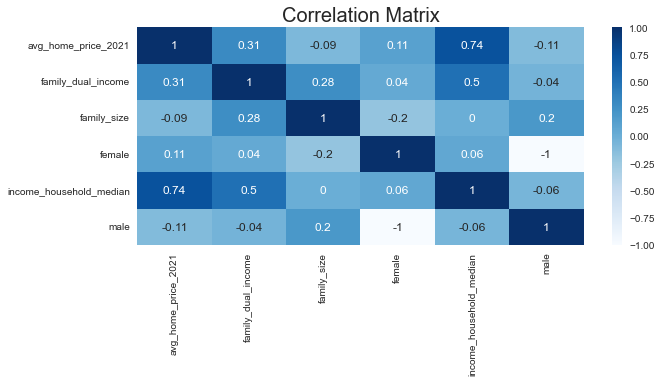

In [43]:
plt.figure(figsize = (10,4))
sns.heatmap(income_pivot_table.corr().round(2),annot=True, cmap = "Blues")
plt.title("Correlation Matrix", fontsize=20)
plt.show()

### Understanding the environmental data

In [44]:
env_data = data[data.columns[22:54]]
# withouth overall risk_score, which was 18th column
env_data["name"] = data.name
env_data["state"] = data.state

In [45]:
env_data_numeric = env_data.select_dtypes(include='number')
env_data_object = env_data.select_dtypes(exclude='number')

### 1. Grouping Environmental risks

In [46]:
env_num_col = ["avalanche_haztyperisk", "earthquake_haztyperisk", 
               "hurricane_haztyperisk", "landslide_haztyperisk", "tornado_haztyperisk", 
               "tsunami_haztyperisk", "volcanicact_haztyperisk", "wildfire_haztyperisk"]

#### General

In [47]:
for i in env_num_col:
    avg_val = env_data[i].mean()
    print(i, "mean: ", round(avg_val, 2))
    med_val = env_data[i].median()
    print(i, "median: ", round(med_val, 2))
    print("Num of Counties greater than the overall average:", len(env_data[env_data[i]>env_data[i].mean()][[i, "name", "state"]]))
    print("Num of Counties, with value of 0:", len(env_data[env_data[i]==0][[i, "name", "state"]]))
    print("---------------------")

avalanche_haztyperisk mean:  2.69
avalanche_haztyperisk median:  0.0
Num of Counties greater than the overall average: 50
Num of Counties, with value of 0: 295
---------------------
earthquake_haztyperisk mean:  5.79
earthquake_haztyperisk median:  1.54
Num of Counties greater than the overall average: 88
Num of Counties, with value of 0: 0
---------------------
hurricane_haztyperisk mean:  4.69
hurricane_haztyperisk median:  1.27
Num of Counties greater than the overall average: 74
Num of Counties, with value of 0: 113
---------------------
landslide_haztyperisk mean:  11.31
landslide_haztyperisk median:  8.65
Num of Counties greater than the overall average: 126
Num of Counties, with value of 0: 13
---------------------
tornado_haztyperisk mean:  15.2
tornado_haztyperisk median:  12.78
Num of Counties greater than the overall average: 153
Num of Counties, with value of 0: 0
---------------------
tsunami_haztyperisk mean:  1.54
tsunami_haztyperisk median:  0.0
Num of Counties greater 

#### State level

In [48]:
for i in env_num_col:
    print('\033[1m' + i)
    print('\033[0m')
    
    ca = env_data[env_data.state=="CA"]
    ca_mean = env_data[env_data.state=="CA"][i].mean() 
    print("CA average for", i, "is", round(ca_mean, 2))
    print("Among", len(env_data[env_data.state=="CA"]), "counties in CA", len(ca[ca[i] > ca_mean]), 
          "counties are above the state average, which is", 
          round(100*len(ca[ca[i] > ca_mean])/len(env_data[env_data.state=="CA"]),2),"%")
    
    print(" ")
    
    tx = env_data[env_data.state=="TX"]
    tx_mean = env_data[env_data.state=="TX"][i].mean()
    print("TX average for", i, "is", round(tx_mean,2))
    print("Among", len(env_data[env_data.state=="TX"]), "counties in TX", len(tx[tx[i] > tx_mean]), 
          "counties are above the state average, which is", 
          round(100*len(tx[tx[i] > tx_mean])/len(env_data[env_data.state=="TX"]),2),"%")
    
    
    print(" ")
    
    wa = env_data[env_data.state=="WA"]  
    wa_mean = env_data[env_data.state=="WA"][i].mean() 
    print("WA average for", i, "is", round(wa_mean,2))
    print("Among", len(env_data[env_data.state=="WA"]), "counties in TX", len(wa[wa[i] > wa_mean]), 
          "counties are above the state average, which is", 
          round(100*len(wa[wa[i] > wa_mean])/len(env_data[env_data.state=="WA"]),2),"%")
    
    print("--------------------------------------------")

avalanche_haztyperisk

CA average for avalanche_haztyperisk is 4.58
Among 58 counties in CA 14 counties are above the state average, which is 24.14 %
 
TX average for avalanche_haztyperisk is 0.01
Among 254 counties in TX 1 counties are above the state average, which is 0.39 %
 
WA average for avalanche_haztyperisk is 17.4
Among 39 counties in TX 11 counties are above the state average, which is 28.21 %
--------------------------------------------
earthquake_haztyperisk

CA average for earthquake_haztyperisk is 21.46
Among 58 counties in CA 25 counties are above the state average, which is 43.1 %
 
TX average for earthquake_haztyperisk is 1.64
Among 254 counties in TX 75 counties are above the state average, which is 29.53 %
 
WA average for earthquake_haztyperisk is 9.49
Among 39 counties in TX 17 counties are above the state average, which is 43.59 %
--------------------------------------------
hurricane_haztyperisk

CA average for hurricane_haztyperisk is 0.14
Among 58 counties in C

In [49]:
data['total_env_score'] = data[env_num_col].sum(axis=1)

In [50]:
data['total_env_score'].describe()

count    351.000000
mean      59.519569
std       38.929729
min        1.915139
25%       35.090614
50%       48.969574
75%       68.752480
max      267.479587
Name: total_env_score, dtype: float64

#### Dropping env columns

In [51]:
data = data.drop(env_num_col, axis=1)

### Plotting the Total environmental score

Text(0.5, 1.0, 'State-by-state Density of Total Environmental Score')

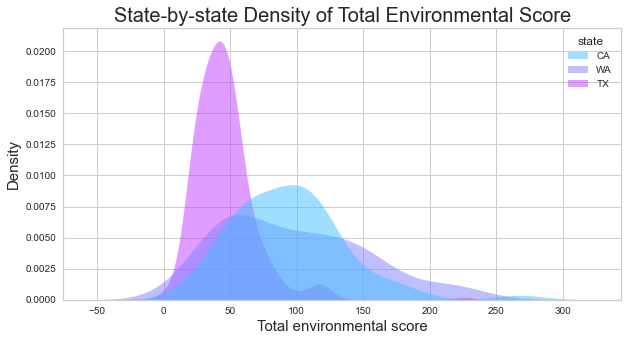

In [52]:
plt.figure(figsize = (10,5))
sns.kdeplot(
   data=data, x="total_env_score", hue="state",
   fill=True, common_norm=False, palette=pal,
   alpha=.5, linewidth=0,
)
plt.xlabel("Total environmental score", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.title("State-by-state Density of Total Environmental Score", fontsize=20)


In [53]:
print('\033[1m' + "Total average for the environmental score is", data.total_env_score.mean())
print('\033[0m')

ca = data[data.state=="CA"]
ca_mean = data[data.state=="CA"]["total_env_score"].mean() 
print("• CA average for total environmental score is", round(ca_mean, 2))
print("Among", len(data[data.state=="CA"]), "counties in CA", len(ca[ca["total_env_score"] > ca_mean]), 
      "counties are above the state average, which is", 
      round(100*len(ca[ca["total_env_score"] > ca_mean])/len(env_data[env_data.state=="CA"]),2),"%")

tx = data[data.state=="TX"]
tx_mean = data[data.state=="TX"]["total_env_score"].mean() 
print("• TX average for total environmental score is", round(tx_mean, 2))
print("Among", len(data[data.state=="TX"]), "counties in TX", len(tx[tx["total_env_score"] > tx_mean]), 
      "counties are above the state average, which is", 
      round(100*len(tx[tx["total_env_score"] > tx_mean])/len(env_data[env_data.state=="TX"]),2),"%")

wa = data[data.state=="WA"]
wa_mean = data[data.state=="WA"]["total_env_score"].mean() 
print("• WA average for total environmental score is", round(wa_mean, 2))
print("Among", len(data[data.state=="WA"]), "counties in WA", len(wa[wa["total_env_score"] > wa_mean]), 
      "counties are above the state average, which is", 
      round(100*len(wa[wa["total_env_score"] > wa_mean])/len(env_data[env_data.state=="WA"]),2),"%")


Total average for the environmental score is 59.519569037037044

• CA average for total environmental score is 94.27
Among 58 counties in CA 28 counties are above the state average, which is 48.28 %
• TX average for total environmental score is 45.75
Among 254 counties in TX 112 counties are above the state average, which is 44.09 %
• WA average for total environmental score is 97.51
Among 39 counties in WA 17 counties are above the state average, which is 43.59 %


<AxesSubplot:xlabel='total_env_score', ylabel='Count'>

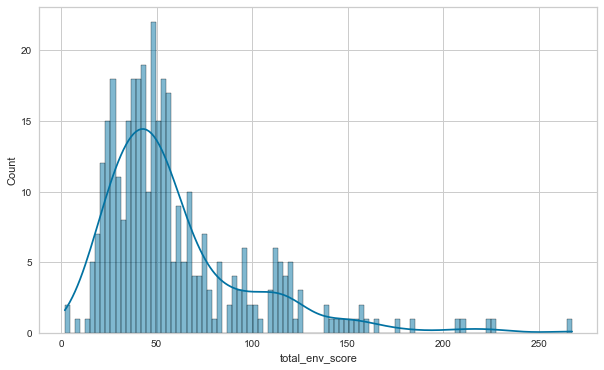

In [54]:
plt.figure(figsize = (10,6))
sns.histplot(data=data, x="total_env_score", kde=True, bins=100, palette=pal)

#### Most and Least Env Scores

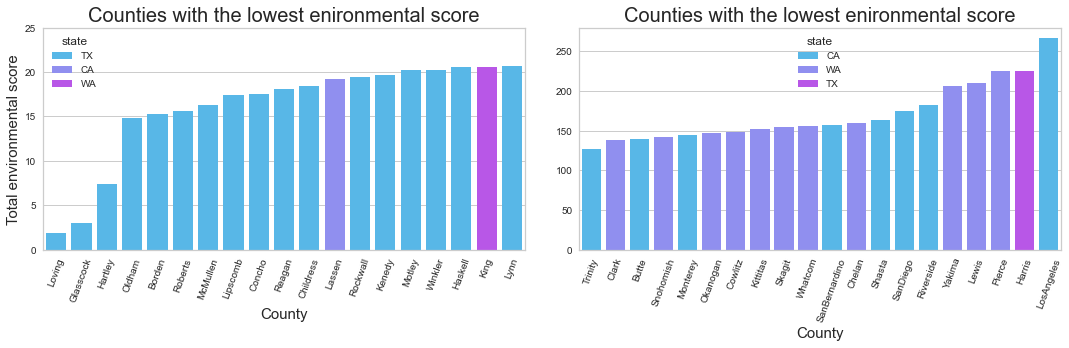

In [55]:
# grouping data
env_sc = data.groupby(["name", "state"]).agg({'total_env_score': "mean"})
env_sc = env_sc.sort_values("total_env_score")
env_sc.reset_index(inplace=True)


# plots
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
sns.barplot(x='name',y='total_env_score', hue='state', data=env_sc.head(20), dodge=False, 
            palette = pal).set_title('Counties with the lowest enironmental score', fontsize = 20)
plt.xlabel("County", fontsize=15)
plt.ylabel("Total environmental score", fontsize=15)    
plt.xticks(rotation=70)
plt.ylim([0,25])
plt.tight_layout()


plt.subplot(1, 2, 2) # index 2
sns.barplot(x='name',y='total_env_score', hue='state', data=env_sc.tail(20), dodge=False, 
            palette = pal).set_title('Counties with the lowest enironmental score', fontsize = 20)
plt.xlabel("County", fontsize=15)
plt.ylabel(" ", fontsize=15)    
plt.xticks(rotation=70)
plt.ylim([0,280])
plt.tight_layout()


### 2. Grouping losses casused by environmental hazards

In [56]:
env_loss_col = ["avalanche_expannloss", "earthquake_expannloss", "hurricane_expannloss", "landslide_expannloss", 
           "tornado_expannloss", "tsunami_expannloss", "volcanicact_expannloss", "wildfire_expannloss"]

In [57]:
env_data.columns

Index(['avalanche_expannloss', 'avalanche_expannlossrating',
       'avalanche_haztyperisk', 'avalanche_haztyperiskrating',
       'earthquake_expannloss', 'earthquake_expannlossrating',
       'earthquake_haztyperisk', 'earthquake_haztyperiskrating',
       'hurricane_expannloss', 'hurricane_expannlossrating',
       'hurricane_haztyperisk', 'hurricane_haztyperiskrating',
       'landslide_expannloss', 'landslide_expannlossrating',
       'landslide_haztyperisk', 'landslide_haztyperiskrating',
       'tornado_expannloss', 'tornado_expannlossrating', 'tornado_haztyperisk',
       'tornado_haztyperiskrating', 'tsunami_expannloss',
       'tsunami_expannlossrating', 'tsunami_haztyperisk',
       'tsunami_haztyperiskrating', 'volcanicact_expannloss',
       'volcanicact_expannlossrating', 'volcanicact_haztyperisk',
       'volcanicact_haztyperiskrating', 'wildfire_expannloss',
       'wildfire_expannlossrating', 'wildfire_haztyperisk',
       'wildfire_haztyperiskrating', 'name', 'state']

#### General

In [58]:
for i in env_loss_col:
    avg_val = env_data[i].mean()
    print(i, "mean: ", round(avg_val, 2))
    med_val = env_data[i].median()
    print(i, "median: ", round(med_val, 2))
    print("Num of Counties greater than the overall average:", len(env_data[env_data[i]>env_data[i].mean()][[i, "name", "state"]]))
    print("Num of Counties, with value of 0:", len(env_data[env_data[i]==0][[i, "name", "state"]]))
    print("---------------------")

avalanche_expannloss mean:  2.45
avalanche_expannloss median:  0.0
Num of Counties greater than the overall average: 51
Num of Counties, with value of 0: 295
---------------------
earthquake_expannloss mean:  7.18
earthquake_expannloss median:  1.72
Num of Counties greater than the overall average: 83
Num of Counties, with value of 0: 0
---------------------
hurricane_expannloss mean:  4.69
hurricane_expannloss median:  1.16
Num of Counties greater than the overall average: 66
Num of Counties, with value of 0: 113
---------------------
landslide_expannloss mean:  13.99
landslide_expannloss median:  11.14
Num of Counties greater than the overall average: 125
Num of Counties, with value of 0: 13
---------------------
tornado_expannloss mean:  15.39
tornado_expannloss median:  12.55
Num of Counties greater than the overall average: 135
Num of Counties, with value of 0: 0
---------------------
tsunami_expannloss mean:  1.39
tsunami_expannloss median:  0.0
Num of Counties greater than the o

#### State level

In [59]:
for i in env_loss_col:
    print('\033[1m' + i)
    print('\033[0m')
    
    ca = env_data[env_data.state=="CA"]
    ca_mean = env_data[env_data.state=="CA"][i].mean() 
    print("CA average for", i, "is", round(ca_mean, 2))
    print("Among", len(env_data[env_data.state=="CA"]), "counties in CA", len(ca[ca[i] > ca_mean]), 
          "counties are above the state average, which is", 
          round(100*len(ca[ca[i] > ca_mean])/len(env_data[env_data.state=="CA"]),2),"%")
    
    print(" ")
    
    tx = env_data[env_data.state=="TX"]
    tx_mean = env_data[env_data.state=="TX"][i].mean()
    print("TX average for", i, "is", round(tx_mean,2))
    print("Among", len(env_data[env_data.state=="TX"]), "counties in TX", len(tx[tx[i] > tx_mean]), 
          "counties are above the state average, which is", 
          round(100*len(tx[tx[i] > tx_mean])/len(env_data[env_data.state=="TX"]),2),"%")
    
    
    print(" ")
    
    wa = env_data[env_data.state=="WA"]
    print("WA average for", i, "is", round(wa_mean,2))
    wa_mean = env_data[env_data.state=="WA"][i].mean() 
    print("Among", len(env_data[env_data.state=="WA"]), "counties in TX", len(wa[wa[i] > wa_mean]), 
          "counties are above the state average, which is", 
          round(100*len(wa[wa[i] > wa_mean])/len(env_data[env_data.state=="WA"]),2),"%")
    
    print("--------------------------------------------")

avalanche_expannloss

CA average for avalanche_expannloss is 4.24
Among 58 counties in CA 15 counties are above the state average, which is 25.86 %
 
TX average for avalanche_expannloss is 0.0
Among 254 counties in TX 1 counties are above the state average, which is 0.39 %
 
WA average for avalanche_expannloss is 97.51
Among 39 counties in TX 10 counties are above the state average, which is 25.64 %
--------------------------------------------
earthquake_expannloss

CA average for earthquake_expannloss is 26.92
Among 58 counties in CA 23 counties are above the state average, which is 39.66 %
 
TX average for earthquake_expannloss is 1.92
Among 254 counties in TX 72 counties are above the state average, which is 28.35 %
 
WA average for earthquake_expannloss is 15.67
Among 39 counties in TX 16 counties are above the state average, which is 41.03 %
--------------------------------------------
hurricane_expannloss

CA average for hurricane_expannloss is 0.11
Among 58 counties in CA 3 coun

In [60]:
data['total_env_loss'] = data[env_loss_col].sum(axis=1)

In [61]:
data = data.drop(env_loss_col, axis=1)

#### Distribution of state-by-state distribution for the total environmental loss

Text(0.5, 1.0, 'State-by-state Density of Total Environmental Loss')

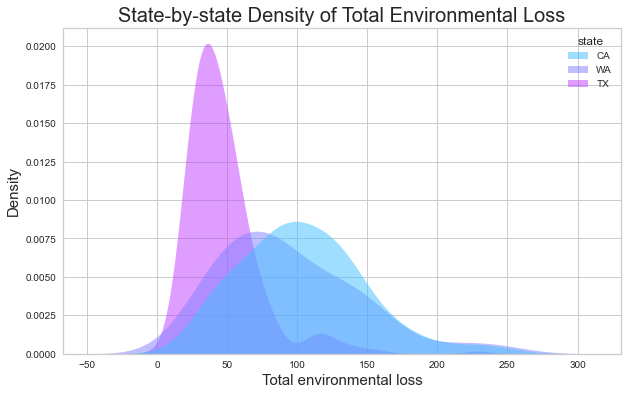

In [62]:
plt.figure(figsize = (10,6))
sns.kdeplot(
   data=data, x="total_env_loss", hue="state",
   fill=True, common_norm=False, palette=pal,
   alpha=.5, linewidth=0,
)

plt.xlabel("Total environmental loss", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.title("State-by-state Density of Total Environmental Loss", fontsize=20)


(0.0, 21.0)

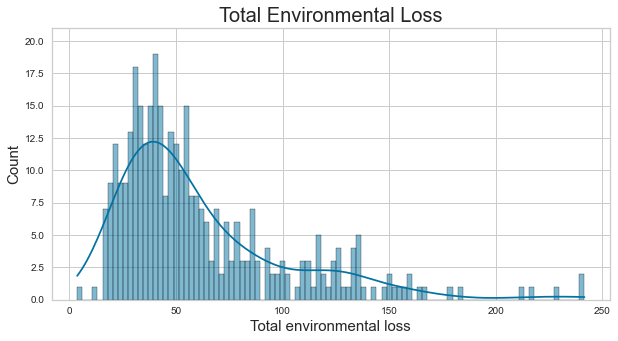

In [63]:
plt.figure(figsize = (10,5))
sns.histplot(data=data, x="total_env_loss", kde=True, bins=100, palette=pal)
plt.xlabel("Total environmental loss", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Total Environmental Loss", fontsize=20)
plt.ylim([0,21])

#### Most and least env losses

In [64]:
#env_sc

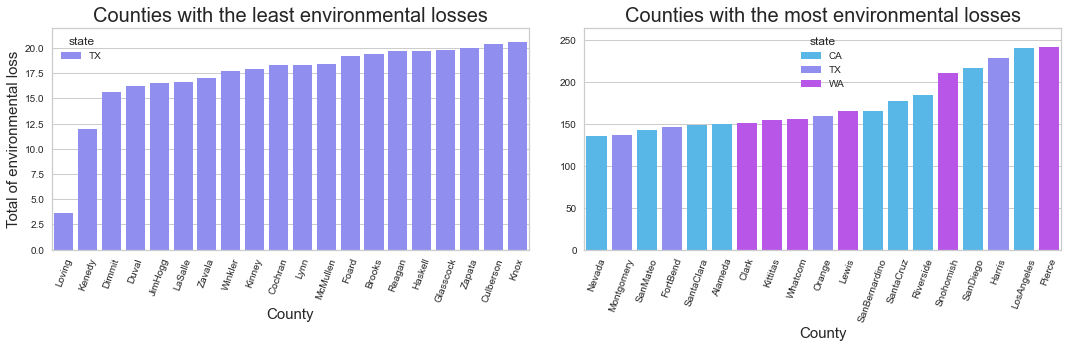

In [65]:
# grouping data
env_loss = data.groupby(["name", "state"]).agg({'total_env_loss': "mean"})
env_loss = env_loss.sort_values("total_env_loss")
env_loss.reset_index(inplace=True)


# plots
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
sns.barplot(x='name', y='total_env_loss', hue='state', data=env_loss.head(20), dodge=False, 
            palette = pal).set_title('Counties with the least environmental losses', fontsize = 20)
plt.xlabel("County", fontsize=15)
plt.ylabel("Total of environmental loss", fontsize=15)    
plt.xticks(rotation=70)
plt.ylim([0,22])
plt.tight_layout()


plt.subplot(1, 2, 2) # index 2
sns.barplot(x='name', y='total_env_loss', hue='state', data=env_loss.tail(20), dodge=False, 
            palette = pal).set_title('Counties with the most environmental losses', fontsize = 20)
plt.xlabel("County", fontsize=15)
plt.ylabel(" ", fontsize=15)    
plt.xticks(rotation=70)
plt.ylim([0,265])
plt.tight_layout()


### Environmental risk rating

In [66]:
rating_cols = [
       'avalanche_expannlossrating', 'avalanche_haztyperiskrating',
       'earthquake_expannlossrating', 'earthquake_haztyperiskrating',
       'hurricane_expannlossrating', 'hurricane_haztyperiskrating',
       'landslide_expannlossrating', 'landslide_haztyperiskrating',
       'tornado_expannlossrating', 'tornado_haztyperiskrating',
       'tsunami_expannlossrating', 'tsunami_haztyperiskrating',
       'volcanicact_expannlossrating', 'volcanicact_haztyperiskrating',
       'wildfire_expannlossrating', 'wildfire_haztyperiskrating']

#### With median rent paid

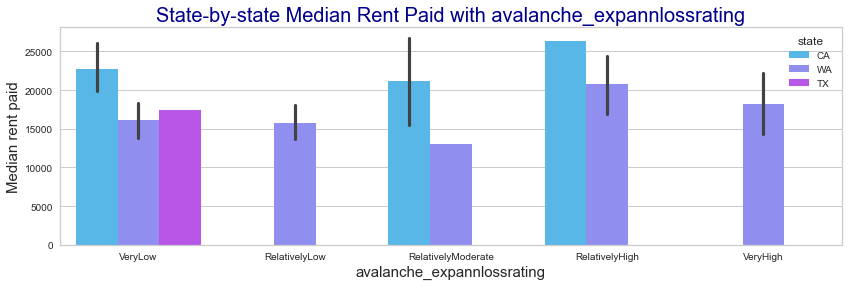

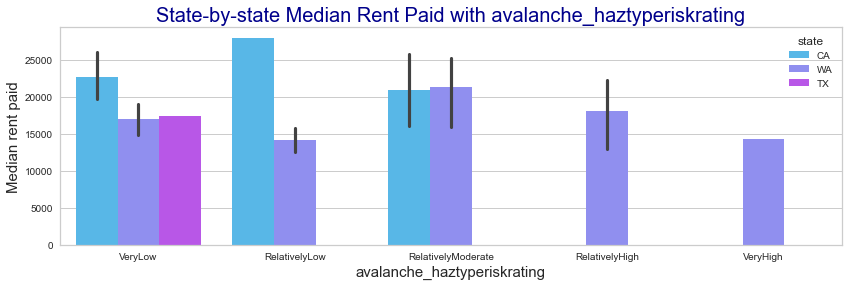

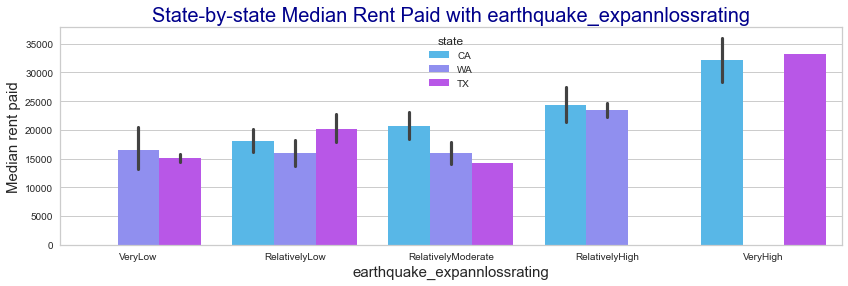

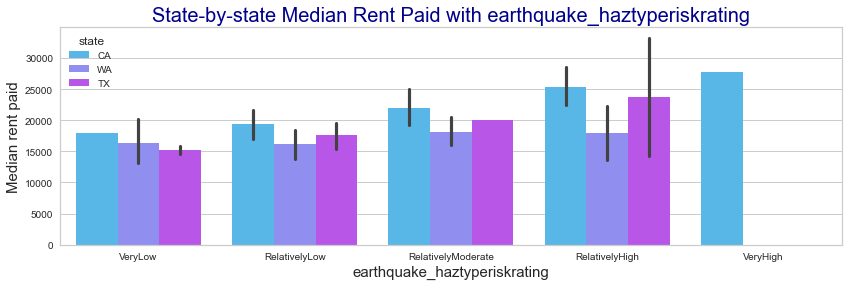

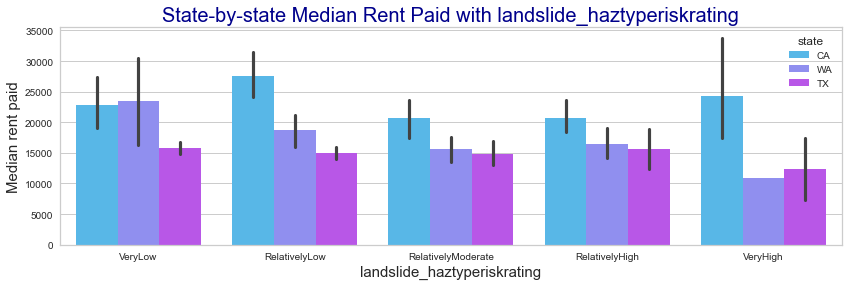

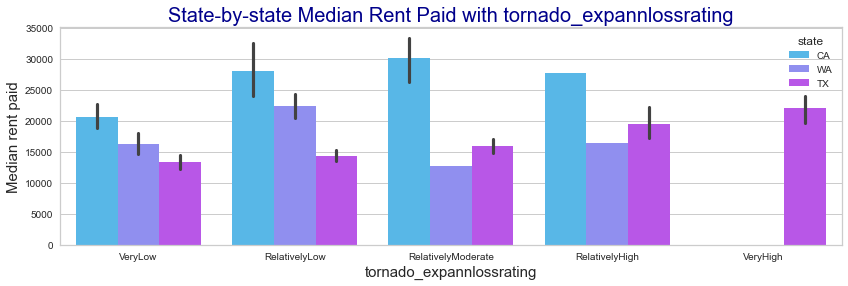

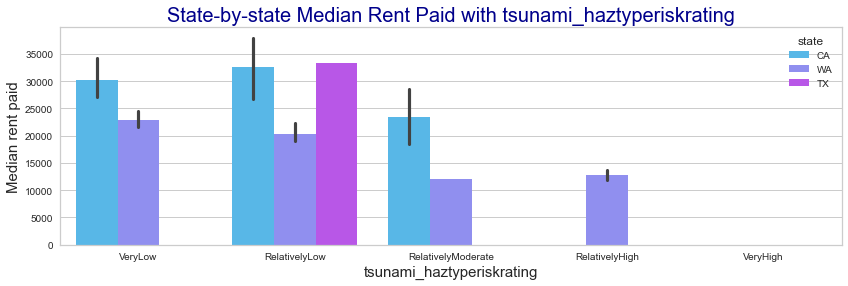

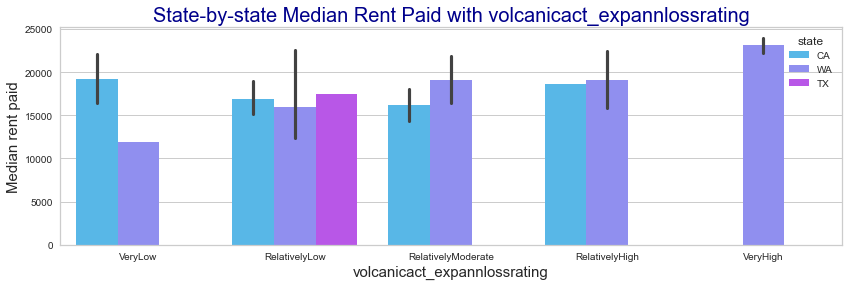

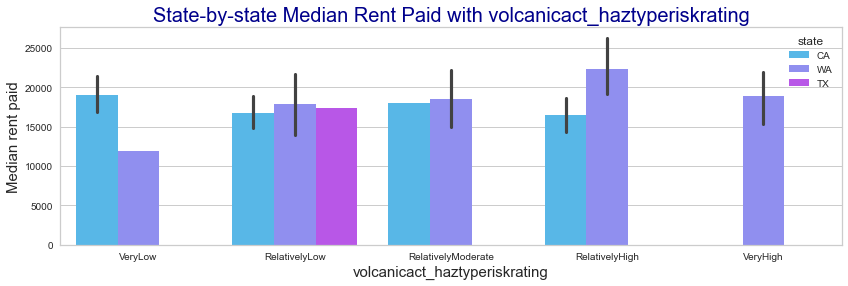

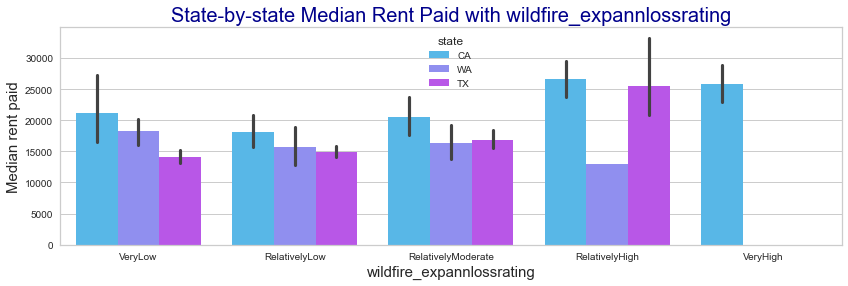

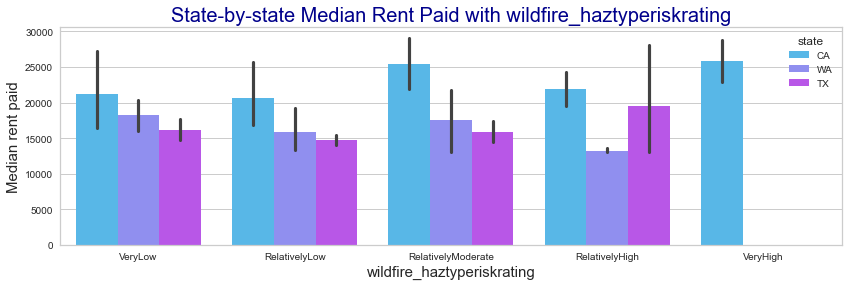

In [67]:
for i in rating_cols: 
    plt.figure(figsize=(14,4))
    sns.barplot(x=i, y="median_rent_paid", hue="state", data=data, 
                palette=pal, order = ["VeryLow", "RelativelyLow", "RelativelyModerate", "RelativelyHigh", "VeryHigh"])
    plt.title(f"State-by-state Median Rent Paid with {i}", fontsize = 20, color = 'darkblue')
    plt.xlabel(i, fontsize=15)
    plt.ylabel("Median rent paid", fontsize=15)
    plt.show()

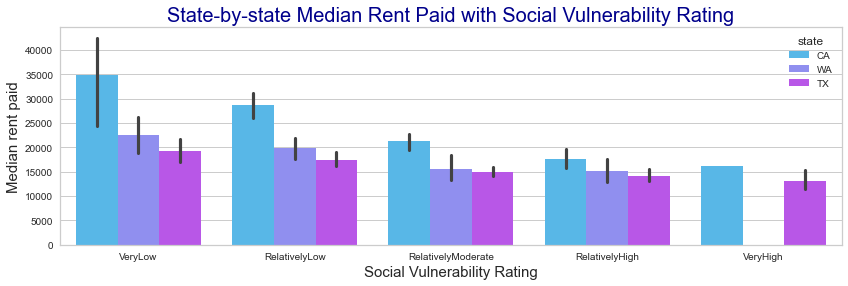

In [68]:
plt.figure(figsize=(14,4))
sns.barplot(x="socialvulnerability_ratng", y="median_rent_paid", hue="state", data=data, 
            palette=pal, order = ["VeryLow", "RelativelyLow", "RelativelyModerate", "RelativelyHigh", "VeryHigh"])
plt.title(f"State-by-state Median Rent Paid with Social Vulnerability Rating", fontsize = 20, color = 'darkblue')
plt.xlabel("Social Vulnerability Rating", fontsize=15)
plt.ylabel("Median rent paid", fontsize=15)
plt.show()

#### With Avg. home price

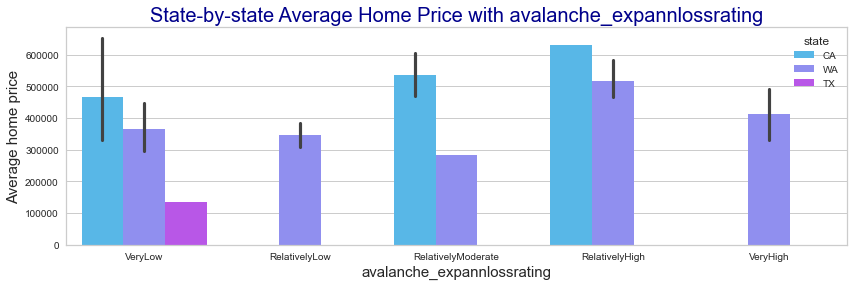

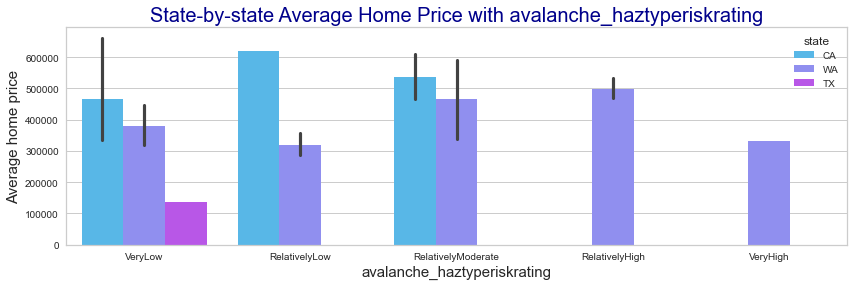

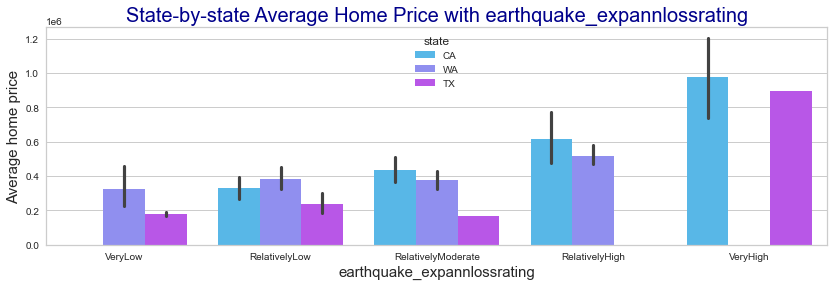

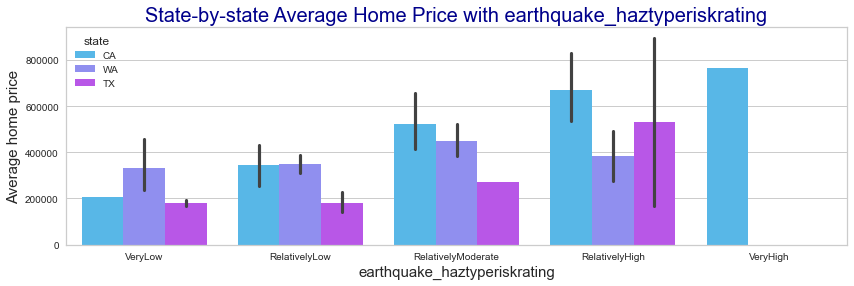

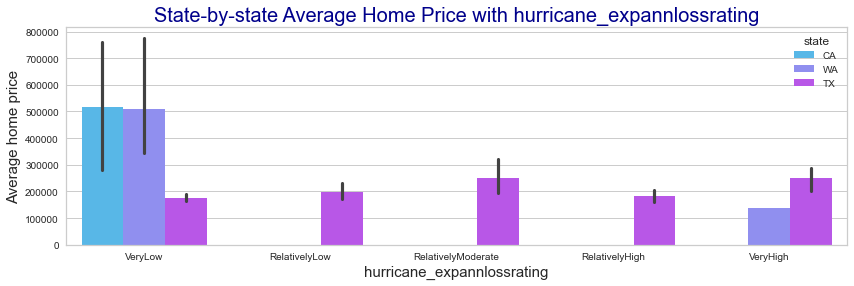

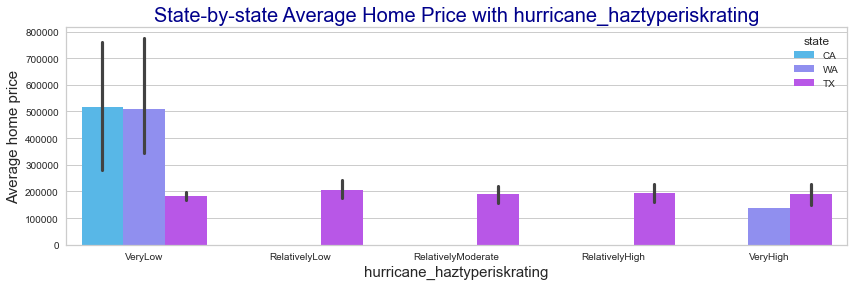

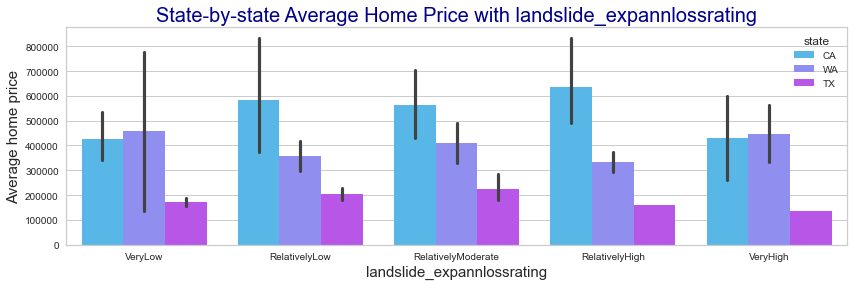

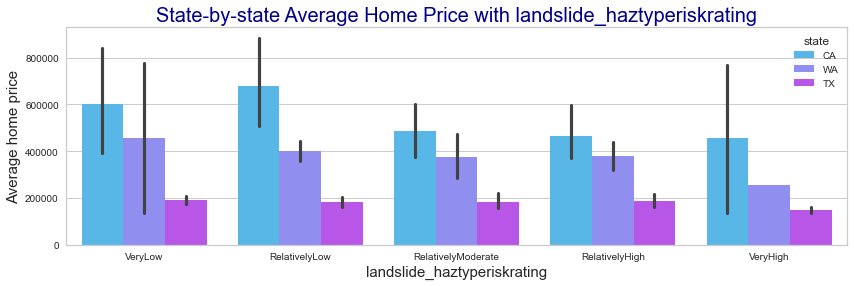

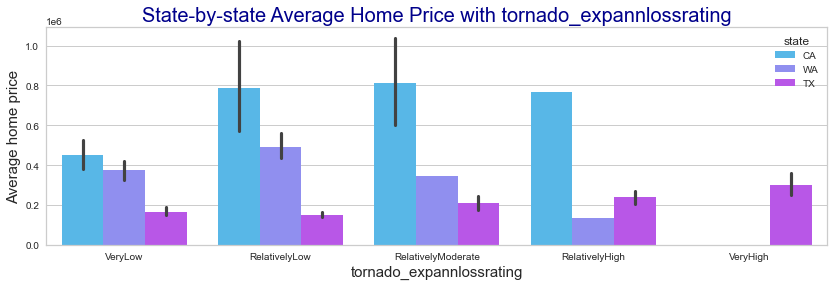

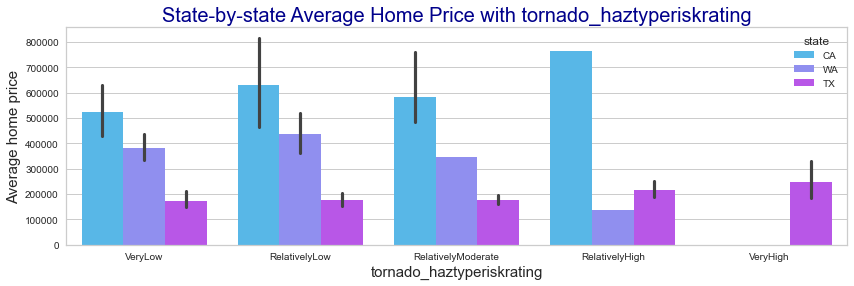

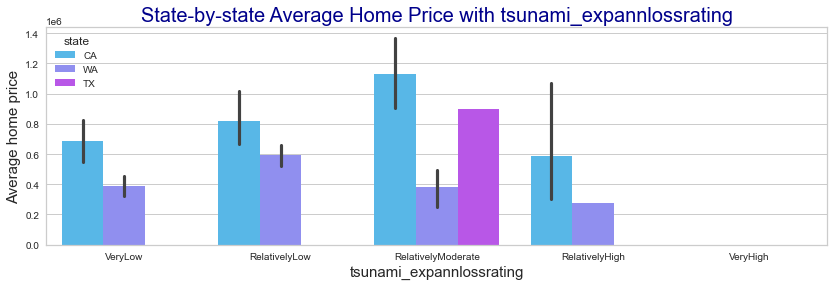

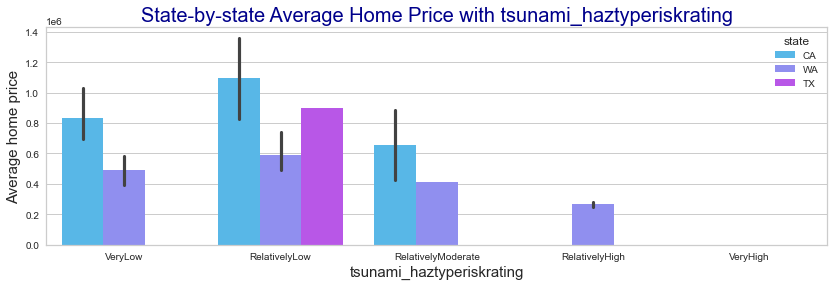

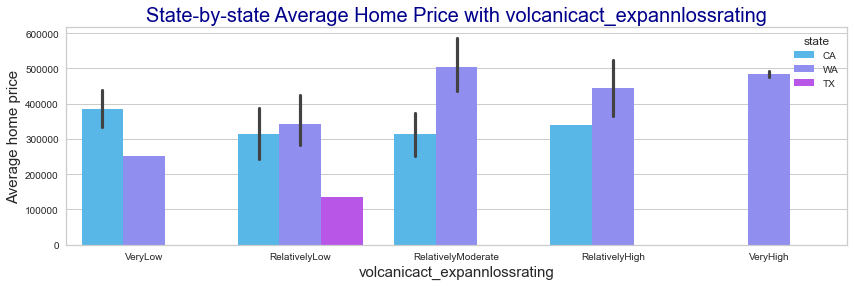

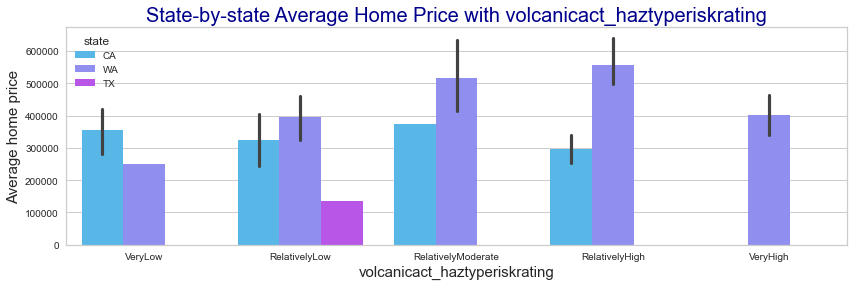

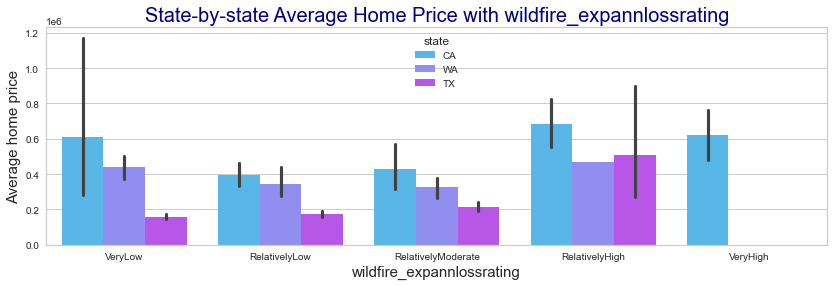

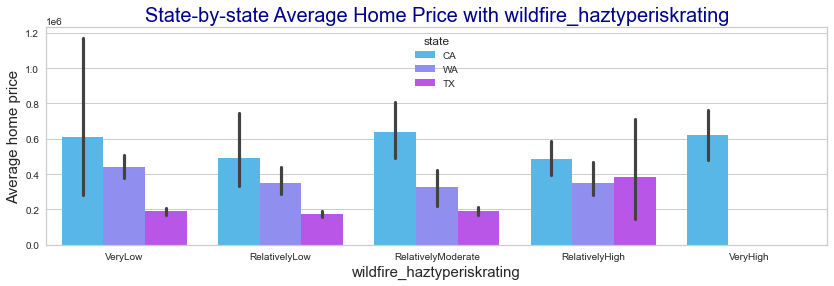

In [69]:
for i in rating_cols: 
    plt.figure(figsize=(14,4))
    sns.barplot(x=i, y="avg_home_price_2021", hue="state", data=data, 
                palette=pal, order = ["VeryLow", "RelativelyLow", "RelativelyModerate", "RelativelyHigh", "VeryHigh"])
    plt.title(f"State-by-state Average Home Price with {i}", fontsize = 20, color = 'darkblue')
    plt.xlabel(i, fontsize=15)
    plt.ylabel("Average home price", fontsize=15)
    plt.show()

In [70]:
data = data.drop(rating_cols , axis=1)

In [71]:
col = ["total_env_score", "total_env_loss"]

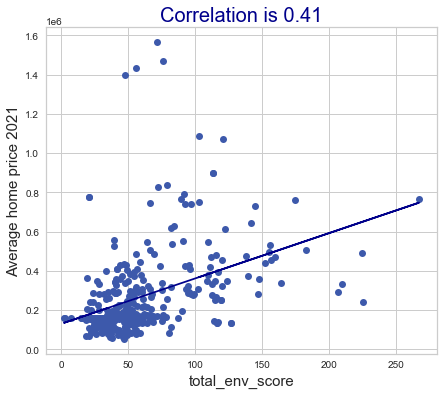

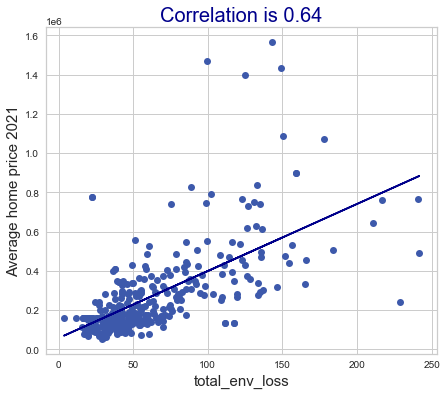

In [72]:
for i in col: 
    plt.figure(figsize = (7,6))
    x=data[i]
    y=data["avg_home_price_2021"]
    plt.plot(x, y, 'o', color = color_everywhere)
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color=line_color)
    plt.title(f"Correlation is {data.avg_home_price_2021.corr(data[i]).round(2)}", fontsize = 20, color = 'darkblue')
    plt.xlabel(i, fontsize=15)
    plt.ylabel("Average home price 2021", fontsize=15)

    plt.show()

In [73]:
data.columns

Index(['name', 'state', 'allpoverty_perc', '0_17_poverty_perc',
       'unemployement_17', 'unemployement_18', 'unemployement_19',
       'unemployement_20', 'unemployement_21', 'medianhouseholdincome2020',
       'pop2010', 'pop2020', 'pop2021', 'change2010-20', 'change2020-21',
       'avglifeexpectancy', 'area', 'risk_score', 'risk_ratng',
       'expannualloss_ratng', 'socialvulnerability_score',
       'socialvulnerability_ratng', 'density', 'age_median', 'age_under_10',
       'age_10_to_19', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s',
       'age_70s', 'age_over_80', 'male', 'female', 'family_size',
       'family_dual_income', 'income_household_median',
       'income_household_under_5', 'income_household_5_to_10',
       'income_household_10_to_15', 'income_household_15_to_20',
       'income_household_20_to_25', 'income_household_25_to_35',
       'income_household_35_to_50', 'income_household_50_to_75',
       'income_household_75_to_100', 'income_household_six_fi

## Dropping not necessary columns for the modeling to avoid correlation

In [74]:
data = data.drop(["unemployement_17", "unemployement_18", "unemployement_19", "unemployement_20", 
                    "pop2010", "pop2020", "risk_score"], axis=1)

In [75]:
data.columns

Index(['name', 'state', 'allpoverty_perc', '0_17_poverty_perc',
       'unemployement_21', 'medianhouseholdincome2020', 'pop2021',
       'change2010-20', 'change2020-21', 'avglifeexpectancy', 'area',
       'risk_ratng', 'expannualloss_ratng', 'socialvulnerability_score',
       'socialvulnerability_ratng', 'density', 'age_median', 'age_under_10',
       'age_10_to_19', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s',
       'age_70s', 'age_over_80', 'male', 'female', 'family_size',
       'family_dual_income', 'income_household_median',
       'income_household_under_5', 'income_household_5_to_10',
       'income_household_10_to_15', 'income_household_15_to_20',
       'income_household_20_to_25', 'income_household_25_to_35',
       'income_household_35_to_50', 'income_household_50_to_75',
       'income_household_75_to_100', 'income_household_six_figure',
       'home_ownership', 'rent_burden', 'w_avg_education',
       'education_stem_degree', 'race_white', 'race_black', 'rac

In [76]:
data_numeric = data.select_dtypes(include='number')
data_object = data.select_dtypes(exclude='number')

In [77]:
data_numeric.columns

Index(['allpoverty_perc', '0_17_poverty_perc', 'unemployement_21',
       'medianhouseholdincome2020', 'pop2021', 'change2010-20',
       'change2020-21', 'avglifeexpectancy', 'area',
       'socialvulnerability_score', 'density', 'age_median', 'age_under_10',
       'age_10_to_19', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s',
       'age_70s', 'age_over_80', 'male', 'female', 'family_size',
       'family_dual_income', 'income_household_median',
       'income_household_under_5', 'income_household_5_to_10',
       'income_household_10_to_15', 'income_household_15_to_20',
       'income_household_20_to_25', 'income_household_25_to_35',
       'income_household_35_to_50', 'income_household_50_to_75',
       'income_household_75_to_100', 'income_household_six_figure',
       'home_ownership', 'rent_burden', 'w_avg_education',
       'education_stem_degree', 'race_white', 'race_black', 'race_asian',
       'race_native', 'race_pacific', 'race_other', 'race_multiple',
       'his

In [78]:
data_object.columns

Index(['name', 'state', 'risk_ratng', 'expannualloss_ratng',
       'socialvulnerability_ratng'],
      dtype='object')

## Preparing data for the analysis

In [79]:
data1 = data

In [80]:
data1 = data1.drop(["name", "socialvulnerability_ratng"], axis=1)

In [81]:
data1.columns

Index(['state', 'allpoverty_perc', '0_17_poverty_perc', 'unemployement_21',
       'medianhouseholdincome2020', 'pop2021', 'change2010-20',
       'change2020-21', 'avglifeexpectancy', 'area', 'risk_ratng',
       'expannualloss_ratng', 'socialvulnerability_score', 'density',
       'age_median', 'age_under_10', 'age_10_to_19', 'age_20s', 'age_30s',
       'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80', 'male',
       'female', 'family_size', 'family_dual_income',
       'income_household_median', 'income_household_under_5',
       'income_household_5_to_10', 'income_household_10_to_15',
       'income_household_15_to_20', 'income_household_20_to_25',
       'income_household_25_to_35', 'income_household_35_to_50',
       'income_household_50_to_75', 'income_household_75_to_100',
       'income_household_six_figure', 'home_ownership', 'rent_burden',
       'w_avg_education', 'education_stem_degree', 'race_white', 'race_black',
       'race_asian', 'race_native', 'race_pacifi

In [82]:
data_numeric1 = data1.select_dtypes(include='number')
data_object1 = data1.select_dtypes(exclude='number')

In [83]:
data_object1.columns

Index(['state', 'risk_ratng', 'expannualloss_ratng'], dtype='object')

In [84]:
# dummy 

data_dummies = pd.get_dummies(data_object1, drop_first = True)
data_dummies.head(2)

state_TX  state_WA  risk_ratng_RelativelyLow  \
0         0         0                         0   
1         0         0                         1   

   risk_ratng_RelativelyModerate  risk_ratng_VeryHigh  risk_ratng_VeryLow  \
0                              0                    0                   0   
1                              0                    0                   0   

   expannualloss_ratng_RelativelyLow  expannualloss_ratng_RelativelyModerate  \
0                                  0                                       0   
1                                  1                                       0   

   expannualloss_ratng_VeryHigh  expannualloss_ratng_VeryLow  
0                             1                            0  
1                             0                            0

In [85]:
data_model = data_numeric1.join(data_dummies, how = 'left')

## Linear Regression

In [86]:
Y = data_model["avg_home_price_2021"]
X = data_model.drop('avg_home_price_2021', axis = 1)
X = sm.add_constant(X)

In [87]:
# train test split data 
X0, X1, Y0, Y1 = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [88]:
# linear model 

model_linear = sm.OLS(Y0, X0)
results = model_linear.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     avg_home_price_2021   R-squared:                       0.922
Model:                             OLS   Adj. R-squared:                  0.900
Method:                  Least Squares   F-statistic:                     40.70
Date:                 Sat, 05 Nov 2022   Prob (F-statistic):           5.30e-91
Time:                         01:51:27   Log-Likelihood:                -3483.7
No. Observations:                  280   AIC:                             7095.
Df Residuals:                      216   BIC:                             7328.
Df Model:                           63                                         
Covariance Type:             nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [89]:
Y1_pred = results.predict(X1)
#print('R^2_test:', round(r2_score(Y1, Y1_pred),4))

In [90]:
print('R^2_test:', round(r2_score(Y1, Y1_pred),4))
print("MSE: ", round(metrics.mean_squared_error(Y1, Y1_pred),4))
print("RMSE:", round(np.sqrt(metrics.mean_squared_error(Y1, Y1_pred)),4))

R^2_test: 0.831
MSE:  7659329292.7664
RMSE: 87517.5942


## VIF


1. VIF 1st run

In [91]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data.head())

                     feature           VIF
0                      const  3.626206e+09
1            allpoverty_perc  1.188037e+01
2          0_17_poverty_perc  1.034705e+01
3           unemployement_21  2.623934e+00
4  medianhouseholdincome2020  1.103952e+01


In [92]:
vif_list = []
for i in range(1,vif_data.shape[0]):
    if(vif_data.VIF[i]>5):
        vif_list.append(vif_data.VIF[i])
        #print(vif_data.feature[i], "---", round(vif_data.VIF[i],4))

In [93]:
print(sorted(vif_list))

[5.559781050656583, 5.800932145666651, 7.109150702649756, 7.519965753393567, 8.437272015274763, 9.431267331895306, 10.347052265709644, 11.03952277723936, 11.144274854495642, 11.840458982770775, 11.880367107546071, 14.170684031218222, 17.081955930145554, 23.48361073967309, 30.27519317540854, 31.515072248288625, 41.32427803901408, 47.25424962307288, 79.77407285917732, 1878.3601867563282, 1956.918377426446, 1969.9141149728016, 2061.1866272583857, 2664.7875326915264, 2676.5807526458707, 2789.9874460624296, 3373.096981662972, 3596.9576317281308, 3816.874152879582, 3857.659523661551, 4239.800728738819, 4615.321265438948, 5567.335555368303, 6530.261960586729, 6715.442391759677, 6985.890095551664, 9094.918073746174, 9271.301365329467, 9887.246477110652, 29092.33921664225, 43861.33941303527, 59946.28232923203, 101959.20595091593, 205053.84390355245, 3604874.427437925, 3604926.6571187247]


In [94]:
vif_data[vif_data.VIF==max(vif_list)]

feature           VIF
22    male  3.604927e+06

In [95]:
grouped = vif_data.groupby('VIF').sum().reset_index()
grouped.sort_values('VIF', ascending=False).head(15)

VIF                      feature
63  3.626206e+09                        const
62  3.604927e+06                         male
61  3.604874e+06                       female
60  2.050538e+05                   race_white
59  1.019592e+05                   race_other
58  5.994628e+04                   race_black
57  4.386134e+04  income_household_six_figure
56  2.909234e+04                   race_asian
55  9.887246e+03                  race_native
54  9.271301e+03    income_household_50_to_75
53  9.094918e+03                race_multiple
52  6.985890e+03                      age_60s
51  6.715442e+03   income_household_75_to_100
50  6.530262e+03    income_household_35_to_50
49  5.567336e+03                      age_70s

In [96]:
data.head(2)

name state  allpoverty_perc  0_17_poverty_perc  unemployement_21  \
0  Alameda    CA              8.6                9.1               6.1   
1   Alpine    CA             14.3               24.5               8.1   

   medianhouseholdincome2020  pop2021  change2010-20  change2020-21  \
0                     113518  1648556          10.23          -2.01   
1                      64542     1235           2.41           2.57   

   avglifeexpectancy  ...  race_pacific race_other race_multiple   hispanic  \
0              80.85  ...       0.72766   9.095745      6.689362  19.582979   
1              80.40  ...       0.30000   5.650000      2.850000  19.600000   

   disabled  median_rent_paid  metro  avg_home_price_2021  total_env_score  \
0   9.42766           33600.9      1            1088290.8       102.834389   
1  10.90000           21609.9      0             469876.1       111.747062   

   total_env_loss  
0      150.468150  
1      114.225055  

[2 rows x 59 columns]

In [97]:
X.columns

Index(['const', 'allpoverty_perc', '0_17_poverty_perc', 'unemployement_21',
       'medianhouseholdincome2020', 'pop2021', 'change2010-20',
       'change2020-21', 'avglifeexpectancy', 'area',
       'socialvulnerability_score', 'density', 'age_median', 'age_under_10',
       'age_10_to_19', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s',
       'age_70s', 'age_over_80', 'male', 'female', 'family_size',
       'family_dual_income', 'income_household_median',
       'income_household_under_5', 'income_household_5_to_10',
       'income_household_10_to_15', 'income_household_15_to_20',
       'income_household_20_to_25', 'income_household_25_to_35',
       'income_household_35_to_50', 'income_household_50_to_75',
       'income_household_75_to_100', 'income_household_six_figure',
       'home_ownership', 'rent_burden', 'w_avg_education',
       'education_stem_degree', 'race_white', 'race_black', 'race_asian',
       'race_native', 'race_pacific', 'race_other', 'race_multiple',
  

In [98]:
X = X.drop("male", axis=1)

In [99]:
X.shape

(351, 63)

2. VIF 2nd run

In [100]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
#print(vif_data)

In [101]:
vif_data.shape[0]

63

In [102]:
vif_list = []
for i in range(1,vif_data.shape[0]):
    if(vif_data.VIF[i]>5):
        vif_list.append(vif_data.VIF[i])
        # print(vif_data.feature[i], "---", round(vif_data.VIF[i],4))
vif_data[vif_data.VIF==max(vif_list)]

feature            VIF
40  race_white  204668.953149

In [103]:
grouped = vif_data.groupby('VIF').sum().reset_index()
grouped.sort_values('VIF', ascending=False).head(15)

VIF                      feature
62  2.556658e+07                        const
61  2.046690e+05                   race_white
60  1.017649e+05                   race_other
59  5.983065e+04                   race_black
58  4.363543e+04  income_household_six_figure
57  2.903595e+04                   race_asian
56  9.868231e+03                  race_native
55  9.221957e+03    income_household_50_to_75
54  9.076850e+03                race_multiple
53  6.920473e+03                      age_60s
52  6.679986e+03   income_household_75_to_100
51  6.496079e+03    income_household_35_to_50
50  5.516257e+03                      age_70s
49  4.577255e+03                 age_under_10
48  4.204521e+03                      age_20s

In [104]:
# vif_data[vif_data.VIF==max(vif_list)]

In [105]:
X = X.drop("race_white", axis=1)

3. VIF 3rd attepmt

In [106]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
#print(vif_data)

In [107]:
vif_list = []
for i in range(1,vif_data.shape[0]):
    if(vif_data.VIF[i]>5):
        vif_list.append(vif_data.VIF[i])
        # print(vif_data.feature[i], "---", round(vif_data.VIF[i],4))
vif_data[vif_data.VIF==max(vif_list)]

feature           VIF
35  income_household_six_figure  43618.095699

In [108]:
X = X.drop("income_household_six_figure", axis=1)

4. VIF 4th attempt

In [109]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
#print(vif_data)

In [110]:
vif_list = []
for i in range(1,vif_data.shape[0]):
    if(vif_data.VIF[i]>5):
        vif_list.append(vif_data.VIF[i])
        # print(vif_data.feature[i], "---", round(vif_data.VIF[i],4))
vif_data[vif_data.VIF==max(vif_list)]

feature          VIF
19  age_60s  6914.959434

In [111]:
X = X.drop("age_60s", axis=1)

5. VIF 5th attempt

In [112]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
#print(vif_data)

In [113]:
vif_list = []
for i in range(1,vif_data.shape[0]):
    if(vif_data.VIF[i]>5):
        vif_list.append(vif_data.VIF[i])
        # print(vif_data.feature[i], "---", round(vif_data.VIF[i],4))
vif_data[vif_data.VIF==max(vif_list)]

feature        VIF
24  income_household_median  46.376853

In [114]:
vif_data[vif_data.VIF==max(vif_list)]

feature        VIF
24  income_household_median  46.376853

In [115]:
X.columns

Index(['const', 'allpoverty_perc', '0_17_poverty_perc', 'unemployement_21',
       'medianhouseholdincome2020', 'pop2021', 'change2010-20',
       'change2020-21', 'avglifeexpectancy', 'area',
       'socialvulnerability_score', 'density', 'age_median', 'age_under_10',
       'age_10_to_19', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_70s',
       'age_over_80', 'female', 'family_size', 'family_dual_income',
       'income_household_median', 'income_household_under_5',
       'income_household_5_to_10', 'income_household_10_to_15',
       'income_household_15_to_20', 'income_household_20_to_25',
       'income_household_25_to_35', 'income_household_35_to_50',
       'income_household_50_to_75', 'income_household_75_to_100',
       'home_ownership', 'rent_burden', 'w_avg_education',
       'education_stem_degree', 'race_black', 'race_asian', 'race_native',
       'race_pacific', 'race_other', 'race_multiple', 'hispanic', 'disabled',
       'median_rent_paid', 'metro', 'total_env_sc

### New OLS

In [116]:
# train test split data 
X0, X1, Y0, Y1 = train_test_split(X, Y, test_size = 0.2, random_state = 42)


In [117]:
# linear model 

model_linear = sm.OLS(Y0, X0)
results = model_linear.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     avg_home_price_2021   R-squared:                       0.921
Model:                             OLS   Adj. R-squared:                  0.900
Method:                  Least Squares   F-statistic:                     43.54
Date:                 Sat, 05 Nov 2022   Prob (F-statistic):           1.45e-93
Time:                         01:51:29   Log-Likelihood:                -3485.9
No. Observations:                  280   AIC:                             7092.
Df Residuals:                      220   BIC:                             7310.
Df Model:                           59                                         
Covariance Type:             nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [118]:
Y1_pred = results.predict(X1)
print('R^2_test:', round(r2_score(Y1, Y1_pred),4))

print("MSE: ", round(metrics.mean_squared_error(Y1, Y1_pred),4))

print("RMSE:", round(np.sqrt(metrics.mean_squared_error(Y1, Y1_pred)),4))


R^2_test: 0.8287
MSE:  7761713309.4682
RMSE: 88100.5863


### Model diagnosis

In [119]:
residuals = results.resid
residuals.head(10)

78     21517.286188
90     56144.384365
16     15825.928214
66     93251.984909
288   -29257.447298
7       8401.703024
110    48977.108322
202   -61395.566749
311     7145.050498
307   -30217.740697
dtype: float64

Residuals are the sample estimate of the error for each observation. 

In [120]:
pred_values = results.predict()

#### 1. Linearity and Equal Variances

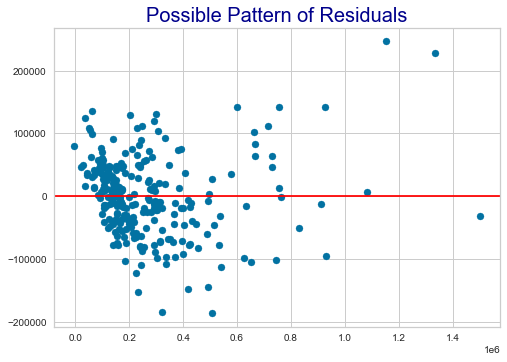

In [121]:
#lets plot predicted values vs residuals to see whether there is any pattern or no

plt.scatter(pred_values, residuals)
plt.title("Possible Pattern of Residuals", fontsize = 20, color = 'darkblue')

plt.axhline(y=0, color='red')

#### 2. Homoscedasticity

In [122]:
#Breusch-Pagan test for homoscedasticity
#The null hypothesis assumes homoskedasticity

bnames = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
breush = het_breuschpagan(residuals, results.model.exog)
print(list(zip(bnames, breush)))

[('Lagrange multiplier statistic', 125.37850996400273), ('p-value', 1.0832007176552005e-06), ('f-value', 3.023597094378826), ('f p-value', 2.2176401454783068e-09)]


We have a small p-value, so we have enough evidence to reject the homoscedasticity assumtion. Homoscedasticity assumption is NOT held.

#### 3. Normality

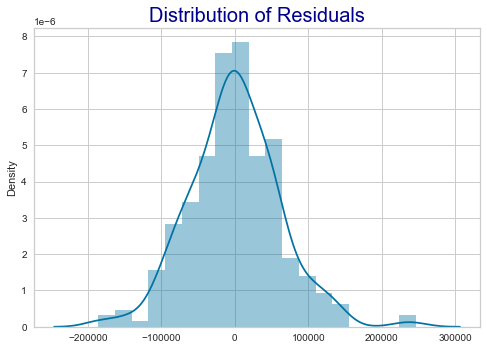

In [123]:
sns.distplot(residuals)
plt.title("Distribution of Residuals", fontsize = 20, color = 'darkblue')
plt.show()

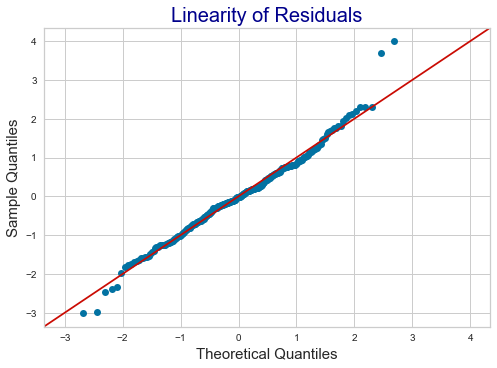

In [124]:
qqplot(residuals, fit =True, line = '45')
plt.title("Linearity of Residuals", fontsize = 20, color = 'darkblue')
plt.xlabel("Theoretical Quantiles", fontsize=15)
plt.ylabel("Sample Quantiles", fontsize=15)
plt.show()

In [125]:
snames = ['The test statistic', 'p-value']
shapiro = shapiro(residuals)
print(list(zip(snames, shapiro)))

[('The test statistic', 0.9856439828872681), ('p-value', 0.006707586348056793)]


In [126]:
if(0.0067 < 0.05):
    print("Yes")
else:
    print("No")
    
#Shapiro-Wilk test shows that we have enough evidence to reject H0, the normality assumption

Yes


## Ridge Regression

In [127]:
# train test split data 
X0, X1, Y0, Y1 = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [128]:
model_ridge = Ridge(alpha=100)
results_ridge = model_ridge.fit(X0,Y0)
results_ridge.score(X0,Y0) # r-squared train

0.9051005072710571

In [129]:
Y1_pred1 = results_ridge.predict(X1)
print('R^2_test:', round(r2_score(Y1, Y1_pred1),4))

print("MSE: ", round(metrics.mean_squared_error(Y1, Y1_pred1),4))

print("RMSE:", round(np.sqrt(metrics.mean_squared_error(Y1, Y1_pred1)),4))


R^2_test: 0.8407
MSE:  7218188101.7548
RMSE: 84959.9206


## Lasso Regression

In [130]:
# train test split data 
X0, X1, Y0, Y1 = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [131]:
model_lasso = Lasso(alpha=100)
results_lasso = model_lasso.fit(X0,Y0)
results_lasso.score(X0,Y0) # r-squared train

0.9208302342037563

In [132]:
# X.columns

In [133]:
# results_lasso.coef_

Discarded features

In [134]:
for i in range(0,len(X.columns)):
    if results_lasso.coef_[i] == 0:
        print(X.columns[i], ":", results_lasso.coef_[i])

const : 0.0
income_household_35_to_50 : 0.0
expannualloss_ratng_RelativelyLow : -0.0
expannualloss_ratng_RelativelyModerate : -0.0


Accepted features

In [135]:
for i in range(0,len(X.columns)):
    if results_lasso.coef_[i] != 0:
        print(X.columns[i], "-", results_lasso.coef_[i])

allpoverty_perc - 3771.470310623353
0_17_poverty_perc - -1763.921926739916
unemployement_21 - -1135.2176052193759
medianhouseholdincome2020 - 4.036270118844608
pop2021 - -0.037274368099247765
change2010-20 - -1042.3763969205966
change2020-21 - -1917.7238296358178
avglifeexpectancy - 3695.5087285011496
area - -4.584651917155088
socialvulnerability_score - 2097.7491381689583
density - 66.79641828606562
age_median - 2059.9798030244488
age_under_10 - -2584.750491221834
age_10_to_19 - 2122.1300524607927
age_20s - 78.80223094645068
age_30s - -956.8429528427945
age_40s - 2434.377723702573
age_50s - 4641.258286105606
age_70s - 2331.2740879626385
age_over_80 - 4301.761917616012
female - 1877.9533215475126
family_size - 33796.04903011437
family_dual_income - -1233.1864302602346
income_household_median - -3.1131847089936584
income_household_under_5 - 1281.7767793203084
income_household_5_to_10 - 854.5113774684444
income_household_10_to_15 - 51.45073899042267
income_household_15_to_20 - 389.269057

In [136]:
results_lasso.score(X1,Y1) # r-squared test

0.8331043009237356

In [137]:
Y1_pred2 = results_lasso.predict(X1)
print('R^2_test:', round(r2_score(Y1, Y1_pred2),4))

print("MSE: ", round(metrics.mean_squared_error(Y1, Y1_pred2),4))

print("RMSE:", round(np.sqrt(metrics.mean_squared_error(Y1, Y1_pred2)),4))


R^2_test: 0.8331
MSE:  7564065570.7694
RMSE: 86971.6366


## Regression Tree 

https://data36.com/regression-tree-python-scikit-learn/ 

In [138]:
Y = data_model["avg_home_price_2021"]
X = X
X = sm.add_constant(X)

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

In [140]:
model = DecisionTreeRegressor(random_state=44)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [141]:
#print(predictions)

In [142]:
pred_comparison = pd.DataFrame()

In [143]:
pred_comparison["real_y_test"] = y_test
pred_comparison["pred_test"] = predictions

In [144]:
pred_comparison["abs_error"] = abs(pred_comparison["real_y_test"] - pred_comparison["pred_test"])

In [145]:
pred_comparison.head(20)

real_y_test  pred_test  abs_error
211     159447.4   159447.4        0.0
201     392403.1   362463.4    29939.7
94      533388.1   380865.5   152522.6
124     216354.7   262325.6    45970.9
133     152079.1   168193.4    16114.3
43     1069319.8   738687.2   330632.6
301     174330.6    78670.7    95659.9
107     356959.4   289514.1    67445.3
90      309226.5   373160.7    63934.2
205     134110.1   165819.4    31709.3
179     180752.8   143744.2    37008.6
277     896939.1   896939.1        0.0
122     184392.7   319754.8   135362.1
142     403626.2   346396.7    57229.5
38      483433.6   427887.8    55545.8
176     344931.7   156831.4   188100.3
175     319890.7   427887.8   107997.1
97      125940.8   111778.4    14162.4
46      252255.8   291818.7    39562.9
174     159447.4   159447.4        0.0

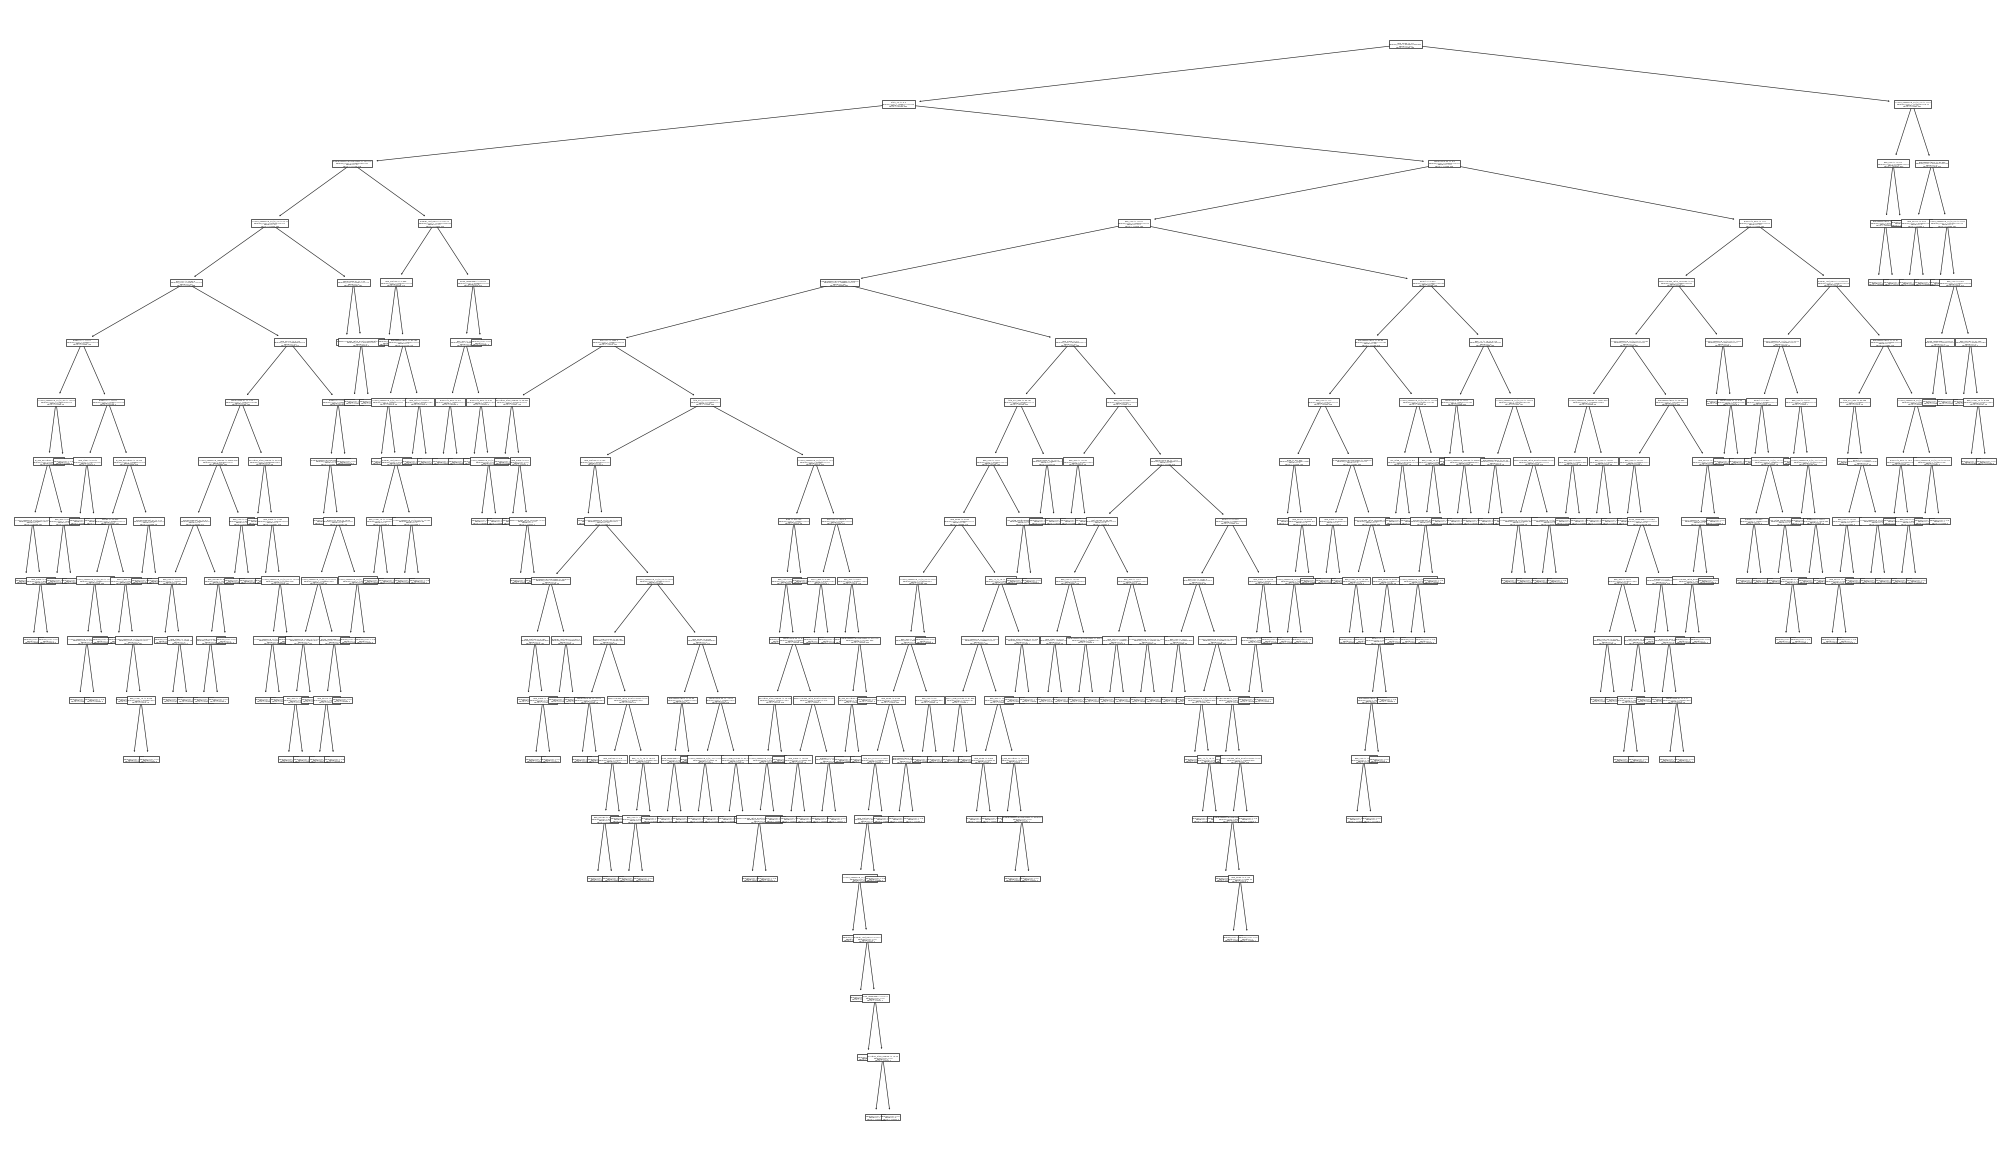

In [146]:
plt.figure(figsize=(17,10), dpi=150)
plot_tree(model, feature_names=X.columns);

## ------------------------------------

In [147]:
print("X has shapes: %s, y has shape: %s" % (X.shape, Y.shape))

X has shapes: (351, 60), y has shape: (351,)


In [148]:
print("Model R^2 score: %s" % round(model.score(X,Y), 3))

Model R^2 score: 0.91


In [149]:
print("Model R^2 score on test set: %s" % round(model.score(X_test,y_test), 3))

Model R^2 score on test set: 0.689


In [150]:
imp = pd.DataFrame()
imp["importance"] = model.feature_importances_
imp["col_name"] = np.transpose(X.columns)

In [151]:
imp.sort_values("importance", ascending=False).head(10)

importance                   col_name
39    0.496447                 race_asian
50    0.184160                   state_TX
32    0.103321  income_household_50_to_75
4     0.079774  medianhouseholdincome2020
6     0.029856              change2010-20
8     0.020404          avglifeexpectancy
46    0.011969           median_rent_paid
31    0.009109  income_household_35_to_50
11    0.008616                    density
5     0.008124                    pop2021

#### 1. Decision Tree Regressor (max_depth  = 3)

In [152]:
dt_reg = tree.DecisionTreeRegressor(max_depth = 3)
dt_reg_fit = dt_reg.fit(X_train,y_train)
print("Model R^2 Score: %s" % round(dt_reg.score(X_test,y_test), 3))

Model R^2 Score: 0.622


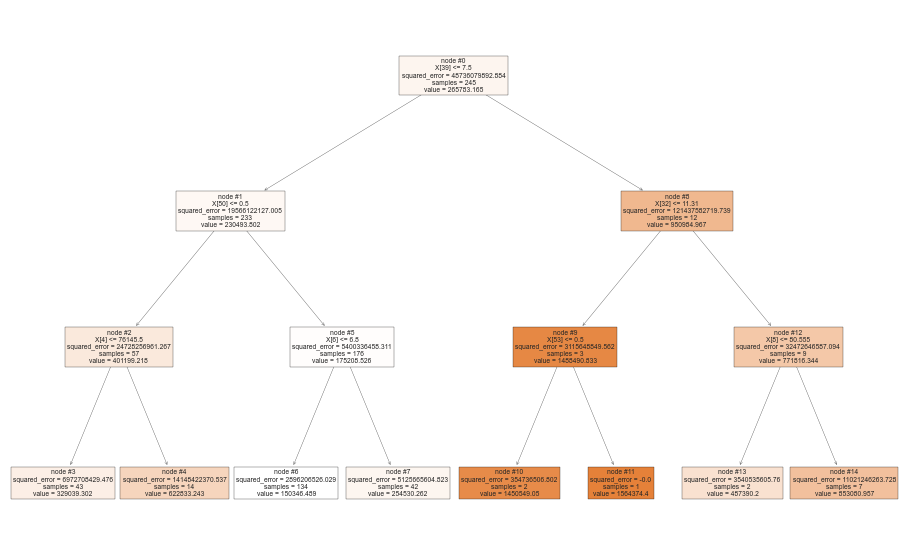

In [153]:
plt.figure(figsize = (16,10))
tree.plot_tree(dt_reg_fit, filled = True, node_ids = True)
plt.show()

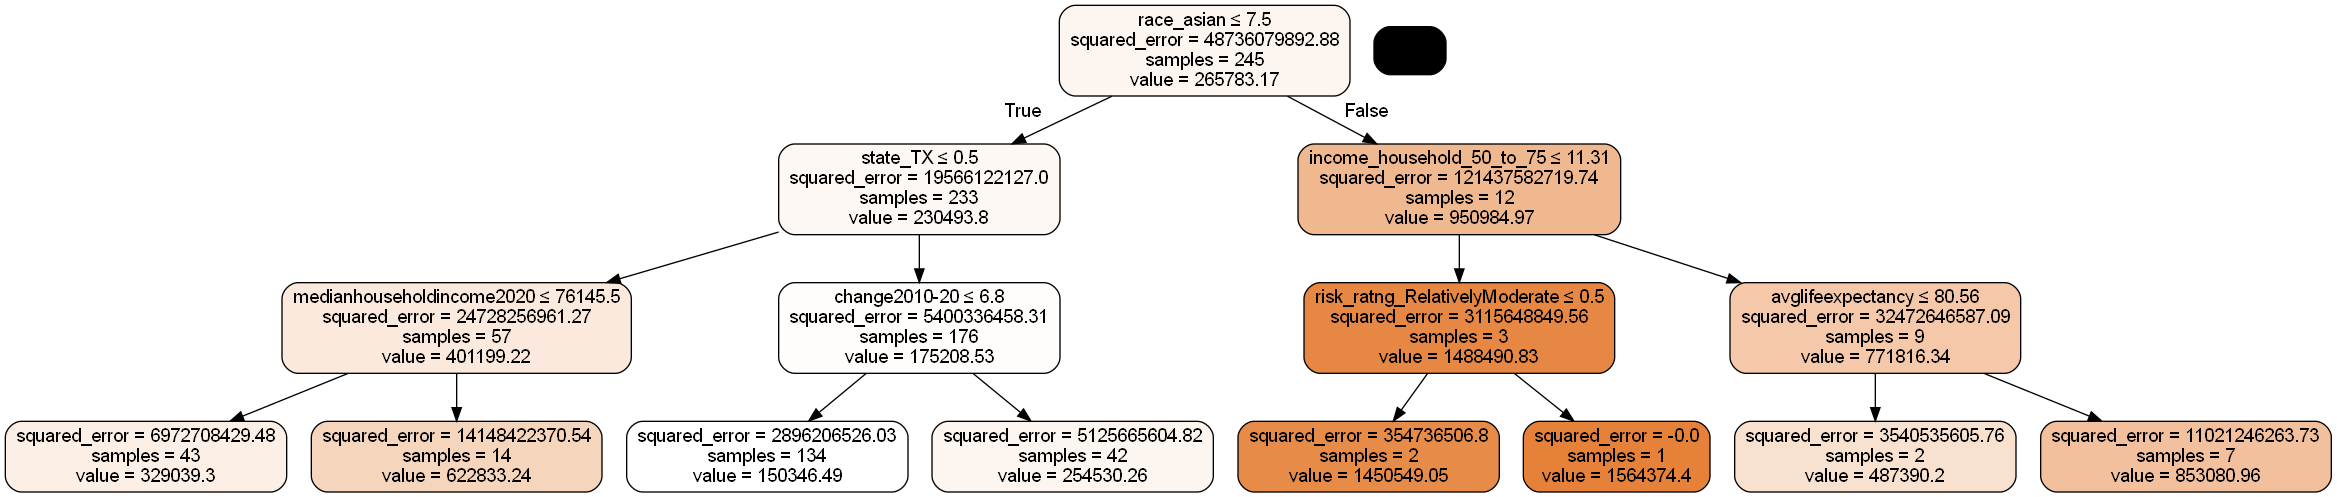

In [154]:
dot_data = StringIO()
#ax=plt.subplots(figsize=(14,7))
export_graphviz(dt_reg_fit, 
                out_file = dot_data,  
                filled = True, 
                rounded = True,
                special_characters = True, 
                feature_names = X.columns,
                precision = 2)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png(), width = 1000, height = 1600)

In [155]:
imp = pd.DataFrame()
imp["importance"] = dt_reg_fit.feature_importances_
imp["col_name"] = np.transpose(X.columns)

In [156]:
imp.sort_values("importance", ascending=False).head(8)

importance                       col_name
39    0.550875                     race_asian
50    0.204474                       state_TX
32    0.107461      income_household_50_to_75
4     0.084768      medianhouseholdincome2020
6     0.032275                  change2010-20
8     0.019344              avglifeexpectancy
53    0.000803  risk_ratng_RelativelyModerate
0     0.000000                          const

Text(0, 0.5, 'Importance')

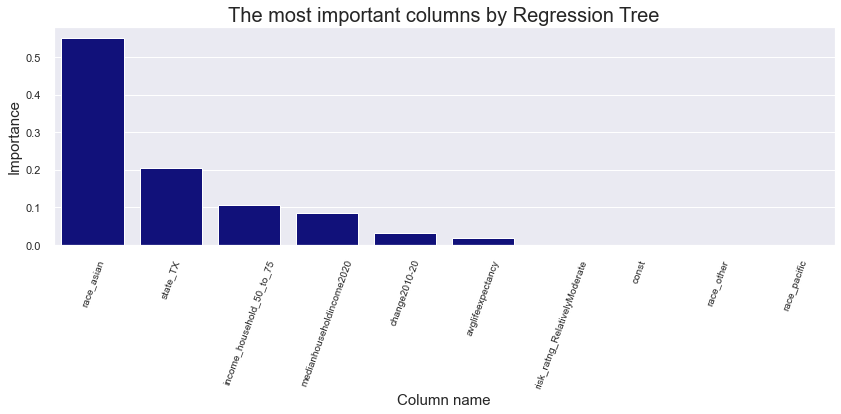

In [157]:
important_top_20 = imp.sort_values("importance", ascending=False).head(10)

sns.set(rc={'figure.figsize':(14,4)})
sns.barplot(x="col_name", y="importance", data=important_top_20, color="darkblue").set_title("The most important columns by Regression Tree",fontsize=20)
plt.xticks(rotation=70, size=10)
plt.xlabel("Column name",fontsize=15)
plt.ylabel("Importance",fontsize=15)


#### 2. Decision Tree Regressor (estimating optimal max_depth parameter based on test MSE)

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [159]:
print("Train feature set shape: %s, Test feature set shape: %s " % (X_train.shape, X_test.shape))
print("Train set labels shape: %s, Test set labels shape: %s " % (y_train.shape, y_test.shape))

Train feature set shape: (280, 60), Test feature set shape: (71, 60) 
Train set labels shape: (280,), Test set labels shape: (71,) 


In [160]:
max_depth_param_list = np.arange(2, 15)
score_results_dtr = []
size = y_test.shape[0]

for depth in max_depth_param_list:
    dt_reg = tree.DecisionTreeRegressor(max_depth = depth)
    dt_reg_fit = dt_reg.fit(X_train, y_train)
    y_predict = dt_reg_fit.predict(X_test)
    
    mean_squared_error = np.mean((y_predict - np.array(y_test).reshape(size,))*(y_predict - np.array(y_test).reshape(size,)))
    score_results_dtr.append(mean_squared_error)
    print("max_depth: %s," % depth, "MSE for Test set = %s" % round(mean_squared_error, 8))

max_depth: 2, MSE for Test set = 28183294872.24234
max_depth: 3, MSE for Test set = 29121692180.82875
max_depth: 4, MSE for Test set = 16609169347.293295
max_depth: 5, MSE for Test set = 19065105366.17528
max_depth: 6, MSE for Test set = 16248560895.163279
max_depth: 7, MSE for Test set = 17861098758.448574
max_depth: 8, MSE for Test set = 18363337038.16864
max_depth: 9, MSE for Test set = 22026303175.545216
max_depth: 10, MSE for Test set = 18312505659.32253
max_depth: 11, MSE for Test set = 18953427946.626263
max_depth: 12, MSE for Test set = 25584200831.71165
max_depth: 13, MSE for Test set = 23952030888.13791
max_depth: 14, MSE for Test set = 22912603791.795155


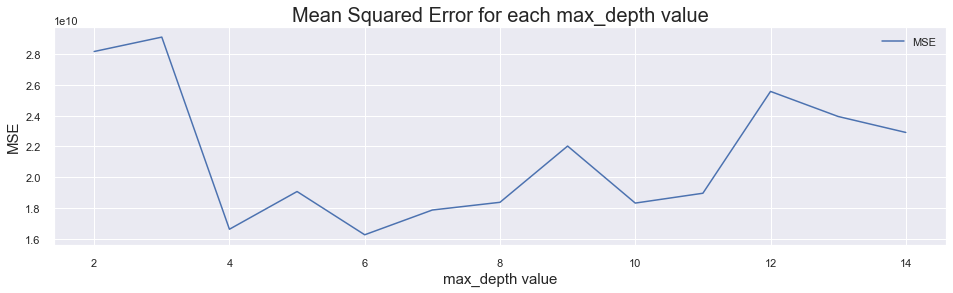

In [161]:
plt.figure(figsize = (16,4))
plt.plot(max_depth_param_list, score_results_dtr, "-", label = "MSE")
plt.title("Mean Squared Error for each max_depth value", fontsize=20)
plt.xlabel("max_depth value", fontsize=15)
plt.ylabel("MSE", fontsize=15)

plt.legend()
plt.show()

In [162]:
optimal_max_depth = np.argmin(score_results_dtr)
print("Optimal Value (MSE is minimum) of max_depth: %s" % max_depth_param_list[optimal_max_depth])

Optimal Value (MSE is minimum) of max_depth: 6


In [163]:
dt_reg_optimal = tree.DecisionTreeRegressor(max_depth = optimal_max_depth)
dt_reg_optimal_fit = dt_reg_optimal.fit(X_train,y_train)

print("Model R^2 score on the test set: %s" % round(dt_reg_optimal.score(X_test,y_test), 3))

Model R^2 score on the test set: 0.73


In [164]:
plt.figure(figsize = (19,12))
tree.plot_tree(dt_reg_optimal_fit, filled = True, node_ids = True)
plt.show()

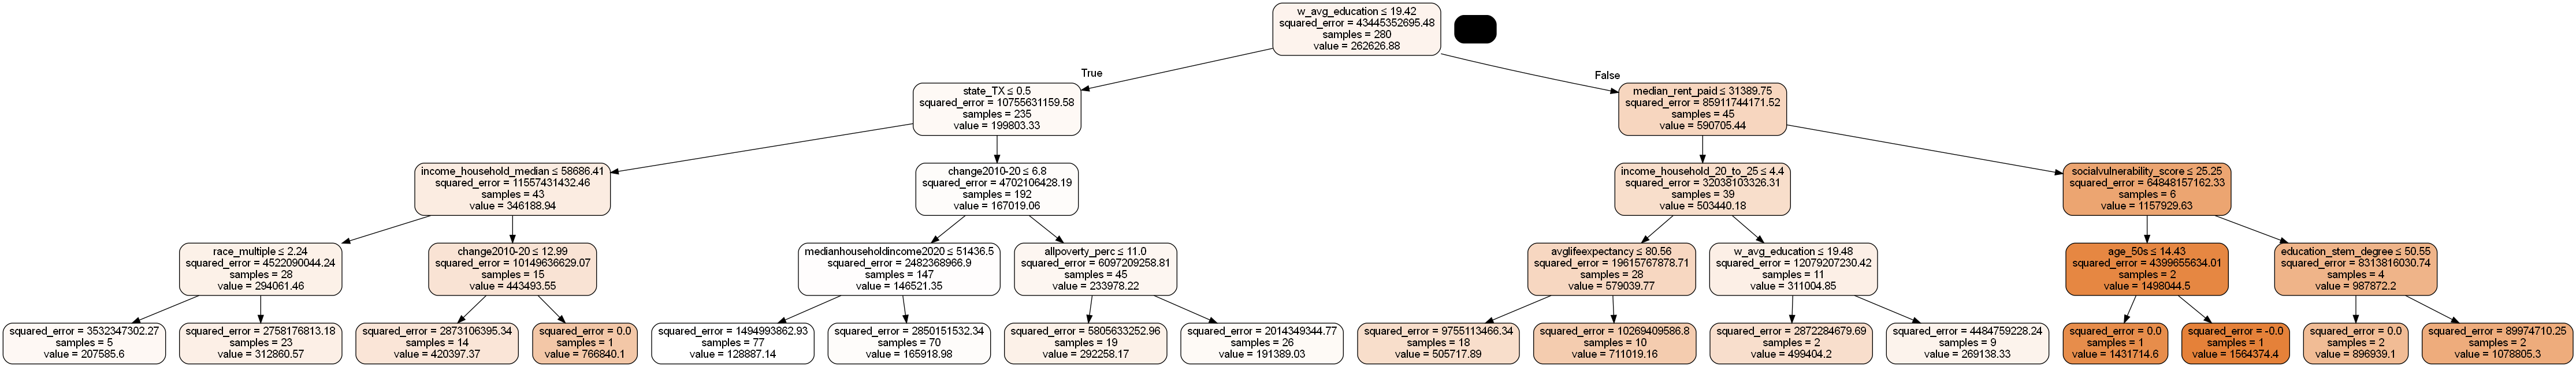

In [165]:
dot_data = StringIO()

export_graphviz(dt_reg_optimal_fit, 
                out_file = dot_data,  
                filled = True, 
                rounded = True,
                special_characters = True, 
                feature_names = X.columns,
                precision = 2)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png(), width = 1000, height = 1600)

### Feature Importance for the Optimized Regression Tree by the MSE

In [166]:
imp = pd.DataFrame()
imp["importance"] = dt_reg_optimal_fit.feature_importances_
imp["col_name"] = np.transpose(X.columns)

In [167]:
imp.sort_values("importance", ascending=False).head(25)

importance                   col_name
36    0.521093            w_avg_education
46    0.198146           median_rent_paid
50    0.100325                   state_TX
29    0.050471  income_household_20_to_25
6     0.033407              change2010-20
10    0.030871  socialvulnerability_score
8     0.024103          avglifeexpectancy
24    0.019402    income_household_median
1     0.009936            allpoverty_perc
4     0.004473  medianhouseholdincome2020
43    0.004049              race_multiple
37    0.002942      education_stem_degree
18    0.000783                    age_50s
38    0.000000                 race_black
44    0.000000                   hispanic
39    0.000000                 race_asian
40    0.000000                race_native
41    0.000000               race_pacific
42    0.000000                 race_other
0     0.000000                      const
47    0.000000                      metro
45    0.000000                   disabled
34    0.000000             home_ownership
48    0.000000            total_env_score
49    0.000000             total_env_loss

Text(0, 0.5, 'Importance')

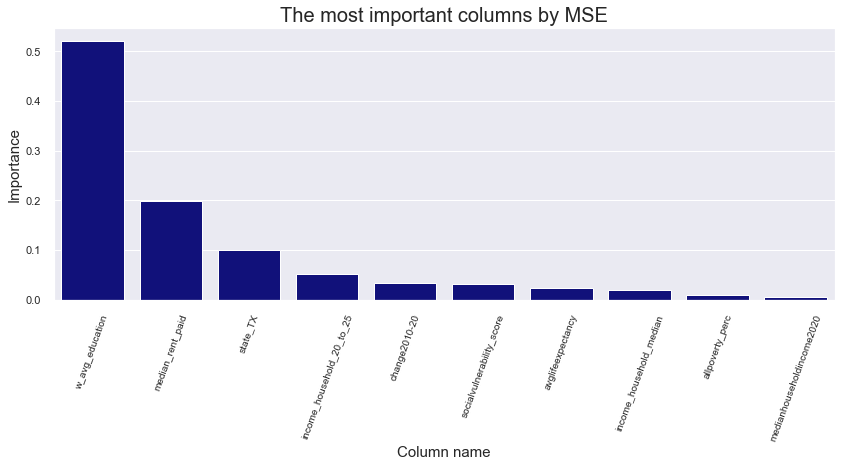

In [168]:
important_top_20 = imp.sort_values("importance", ascending=False).head(10)

sns.set(rc={'figure.figsize':(14,5)})
sns.barplot(x="col_name", y="importance", data=important_top_20, color="darkblue").set_title("The most important columns by MSE",fontsize=20)
plt.xticks(rotation=70, size=10)
plt.xlabel("Column name",fontsize=15)
plt.ylabel("Importance",fontsize=15)


#### 3. Decision Tree Regressor (estimating optimal max_depth parameter using CV)

In [169]:
max_depth_param_list = np.arange(2, 20)
score_results_dt = []

for depth in max_depth_param_list:
    dt_reg = tree.DecisionTreeRegressor(max_depth = depth)
    kfold = KFold(n_splits=10)
    score = cross_val_score(dt_reg, X_train, y_train, cv = 10) # default scoring is R^2
    score_results_dt.append(score)
    print("max_depth val: %s, CV Score Avg: %s " % (depth, np.mean(score)))

max_depth val: 2, CV Score Avg: 0.5347794684167227 
max_depth val: 3, CV Score Avg: 0.41930834469831535 
max_depth val: 4, CV Score Avg: 0.6095557028800139 
max_depth val: 5, CV Score Avg: 0.6458282905324368 
max_depth val: 6, CV Score Avg: 0.6717508005073232 
max_depth val: 7, CV Score Avg: 0.6430430409396596 
max_depth val: 8, CV Score Avg: 0.6418331528813405 
max_depth val: 9, CV Score Avg: 0.6398208940014961 
max_depth val: 10, CV Score Avg: 0.5370922769952433 
max_depth val: 11, CV Score Avg: 0.6114692844211003 
max_depth val: 12, CV Score Avg: 0.3726315890601896 
max_depth val: 13, CV Score Avg: 0.4584376123291262 
max_depth val: 14, CV Score Avg: 0.5885787535711466 
max_depth val: 15, CV Score Avg: 0.45076204089719124 
max_depth val: 16, CV Score Avg: 0.5962313201751622 
max_depth val: 17, CV Score Avg: 0.6016862885895586 
max_depth val: 18, CV Score Avg: 0.51954907391929 
max_depth val: 19, CV Score Avg: 0.6741420022401268 


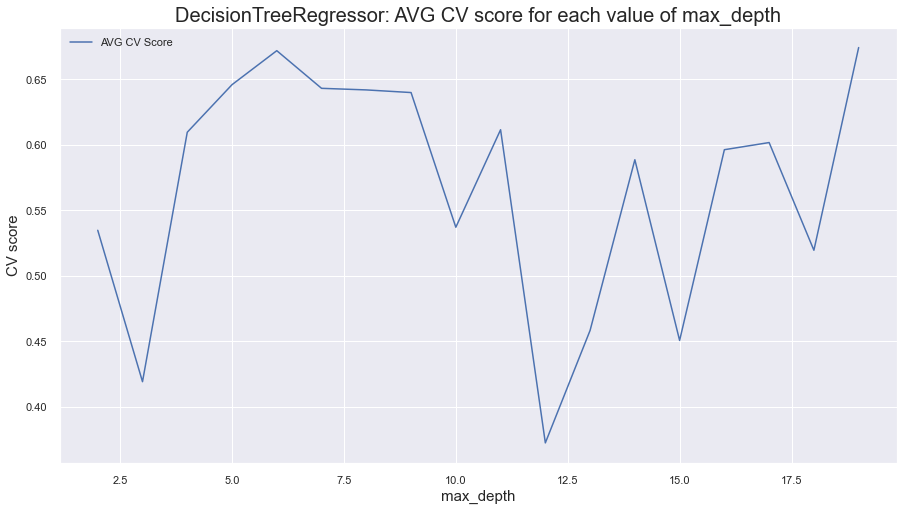

In [170]:
plt.figure(figsize = (15,8)) 
plt.plot(max_depth_param_list, np.mean(np.array(score_results_dt), axis = 1), label = "AVG CV Score")
plt.title("DecisionTreeRegressor: AVG CV score for each value of max_depth", fontsize=20)
plt.xlabel("max_depth", fontsize=15)
plt.ylabel("CV score", fontsize=15)

plt.legend()
plt.show()

In [171]:
dt_avg_cv_scores = np.mean(np.array(score_results_dt), axis = 1)
dt_max_avg_accuracy_index = np.argmax(dt_avg_cv_scores) 
print("Optimal max_depth value using CV: %s" % max_depth_param_list[dt_max_avg_accuracy_index]) 

Optimal max_depth value using CV: 19


In [172]:
mod_dt_reg = tree.DecisionTreeRegressor(max_depth = max_depth_param_list[dt_max_avg_accuracy_index])
mod_dt_reg_fit = mod_dt_reg.fit(X_train,y_train)
model_dt_score = mod_dt_reg_fit.score(X_test,y_test)
print("Model Score on test set: %s" % model_dt_score)

Model Score on test set: 0.5497325327880782


In [173]:
dot_data = StringIO()

export_graphviz(mod_dt_reg_fit, 
                out_file = dot_data,  
                filled = True, 
                rounded = True,
                special_characters = True, 
                feature_names = X.columns,
                precision = 2 )

pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), width = 1000, height = 1600)

# Create PNG
image = graph.write_png("dec_tree_optimal_CV.png")

### Feature importance for the optimized Regression tree by Cross Validation

In [174]:
imp = pd.DataFrame()
imp["importance"] = mod_dt_reg_fit.feature_importances_
imp["col_name"] = np.transpose(X.columns)

In [175]:
imp.sort_values("importance", ascending=False).head(15)

importance                   col_name
36    0.476766            w_avg_education
46    0.185421           median_rent_paid
50    0.092711                   state_TX
29    0.047615  income_household_20_to_25
49    0.029385             total_env_loss
8     0.023441          avglifeexpectancy
6     0.022167              change2010-20
24    0.021977    income_household_median
45    0.010303                   disabled
1     0.009278            allpoverty_perc
31    0.009214  income_household_35_to_50
20    0.008394                age_over_80
4     0.007985  medianhouseholdincome2020
30    0.007418  income_household_25_to_35
5     0.005609                    pop2021

Text(0, 0.5, 'Importance')

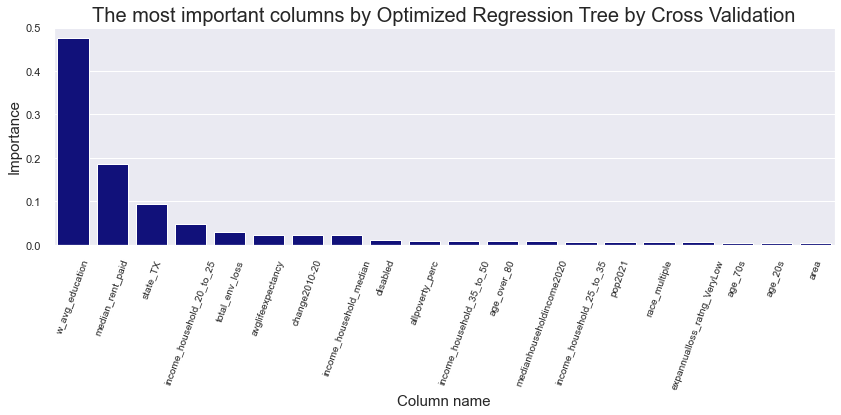

In [176]:
important_top_20 = imp.sort_values("importance", ascending=False).head(20)

sns.set(rc={'figure.figsize':(14,4)})
sns.barplot(x="col_name", y="importance", data=important_top_20, 
            color="darkblue").set_title("The most important columns by Optimized Regression Tree by Cross Validation",fontsize=20)
plt.xticks(rotation=70, size=10)
plt.xlabel("Column name",fontsize=15)
plt.ylabel("Importance",fontsize=15)


#### Random Forest Regressor

In [177]:
max_depth_param_list = np.arange(2, 22)
score_results_rf = []

for depth in max_depth_param_list:
    rf_reg = RandomForestRegressor(max_depth = depth, max_features = 3, n_estimators = 100)
    kfold = KFold(n_splits=10)
    score = cross_val_score(rf_reg, X_train, y_train, cv = 10) # default scoring is R^2
    score_results_rf.append(score)
    print("max_depth val: %s, CV Score Avg: %s " % (depth, np.mean(score)))

max_depth val: 2, CV Score Avg: 0.5625400445586044 
max_depth val: 3, CV Score Avg: 0.6645609115494281 
max_depth val: 4, CV Score Avg: 0.721603173810821 
max_depth val: 5, CV Score Avg: 0.7463151942708929 
max_depth val: 6, CV Score Avg: 0.7800140197733318 
max_depth val: 7, CV Score Avg: 0.7795370985247319 
max_depth val: 8, CV Score Avg: 0.7921860447489965 
max_depth val: 9, CV Score Avg: 0.7798105180188232 
max_depth val: 10, CV Score Avg: 0.7808313008981941 
max_depth val: 11, CV Score Avg: 0.7850470551927211 
max_depth val: 12, CV Score Avg: 0.7949333057850808 
max_depth val: 13, CV Score Avg: 0.7873548526954047 
max_depth val: 14, CV Score Avg: 0.788183552918757 
max_depth val: 15, CV Score Avg: 0.79463950707013 
max_depth val: 16, CV Score Avg: 0.7876499379547827 
max_depth val: 17, CV Score Avg: 0.7824792117209121 
max_depth val: 18, CV Score Avg: 0.78730922328392 
max_depth val: 19, CV Score Avg: 0.7988005603827462 
max_depth val: 20, CV Score Avg: 0.8030371281543938 
max_dep

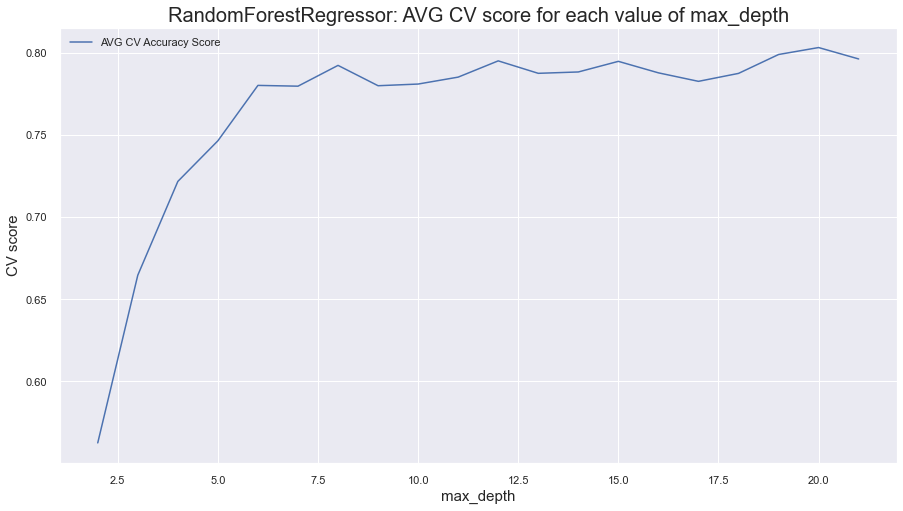

In [178]:
plt.figure(figsize = (15,8)) 
plt.plot(max_depth_param_list, np.mean(np.array(score_results_rf), axis = 1), label = "AVG CV Accuracy Score")
plt.title("RandomForestRegressor: AVG CV score for each value of max_depth", fontsize=20)
plt.xlabel("max_depth", fontsize=15)
plt.ylabel("CV score", fontsize=15)

plt.legend()
plt.show()

In [179]:
rf_avg_cv_scores = np.mean(np.array(score_results_rf), axis = 1)
rf_max_avg_accuracy_index = np.argmax(rf_avg_cv_scores) 
print("Optimal max_depth value using CV: %s" % max_depth_param_list[rf_max_avg_accuracy_index]) 

Optimal max_depth value using CV: 20


In [180]:
mod_rf_reg = RandomForestRegressor(max_depth = max_depth_param_list[rf_max_avg_accuracy_index], oob_score = True)
mod_rf_reg_fit = mod_rf_reg.fit(X_train,y_train)
model_rf_score = mod_rf_reg_fit.score(X_test,y_test)
print("Model Score on test set: %s" % model_rf_score)

Model Score on test set: 0.8586359656600255


### Feature importance for the Random Forests

In [181]:
imp = pd.DataFrame()
imp["importance"] = mod_rf_reg_fit.feature_importances_
imp["col_name"] = np.transpose(X.columns)

In [182]:
imp.sort_values("importance", ascending=False).head(15)

importance                   col_name
36    0.239143            w_avg_education
46    0.222112           median_rent_paid
50    0.116889                   state_TX
4     0.048400  medianhouseholdincome2020
49    0.040466             total_env_loss
37    0.030404      education_stem_degree
7     0.028536              change2020-21
11    0.026769                    density
24    0.024725    income_household_median
6     0.024237              change2010-20
8     0.023158          avglifeexpectancy
42    0.018535                 race_other
39    0.017830                 race_asian
31    0.011773  income_household_35_to_50
2     0.010461          0_17_poverty_perc

Text(0, 0.5, 'Importance')

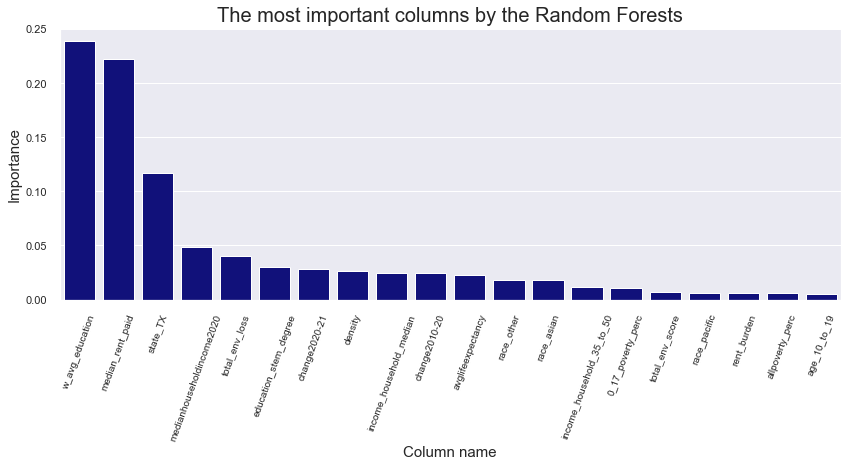

In [183]:
important_top_20 = imp.sort_values("importance", ascending=False).head(20)

sns.set(rc={'figure.figsize':(14,5)})
sns.barplot(x="col_name", y="importance", data=important_top_20, 
            color="darkblue").set_title("The most important columns by the Random Forests",fontsize=20)
plt.xticks(rotation=70, size=10)
plt.xlabel("Column name",fontsize=15)
plt.ylabel("Importance",fontsize=15)


#### Ada Boost Regressor

In [184]:
max_depth_param_list = np.arange(2, 22)
score_results_ab = []

for depth in max_depth_param_list:
    ab_reg = AdaBoostRegressor(tree.DecisionTreeRegressor(
        max_depth = depth), n_estimators = 500, learning_rate = 1)
    kfold = KFold(n_splits=10)
    score = cross_val_score(ab_reg, X_train, y_train, cv = 10) # default scoring is R^2
    score_results_ab.append(score)
    print("max_depth val: %s, CV Score Avg: %s " % (depth, np.mean(score)))

max_depth val: 2, CV Score Avg: 0.6404922846160157 
max_depth val: 3, CV Score Avg: 0.7884187041345915 
max_depth val: 4, CV Score Avg: 0.8194625848745767 
max_depth val: 5, CV Score Avg: 0.8302356663550554 
max_depth val: 6, CV Score Avg: 0.8450200486488489 
max_depth val: 7, CV Score Avg: 0.8521550328380274 
max_depth val: 8, CV Score Avg: 0.8502844280318758 
max_depth val: 9, CV Score Avg: 0.8601073522344074 
max_depth val: 10, CV Score Avg: 0.8515206941871956 
max_depth val: 11, CV Score Avg: 0.8541204411427984 
max_depth val: 12, CV Score Avg: 0.8518972956088173 
max_depth val: 13, CV Score Avg: 0.8490337556784111 
max_depth val: 14, CV Score Avg: 0.8511908803277579 
max_depth val: 15, CV Score Avg: 0.8474490203056131 
max_depth val: 16, CV Score Avg: 0.8521642489006744 
max_depth val: 17, CV Score Avg: 0.8507825601605437 
max_depth val: 18, CV Score Avg: 0.8562275834365394 
max_depth val: 19, CV Score Avg: 0.8494194984134686 
max_depth val: 20, CV Score Avg: 0.8471117586472742 
m

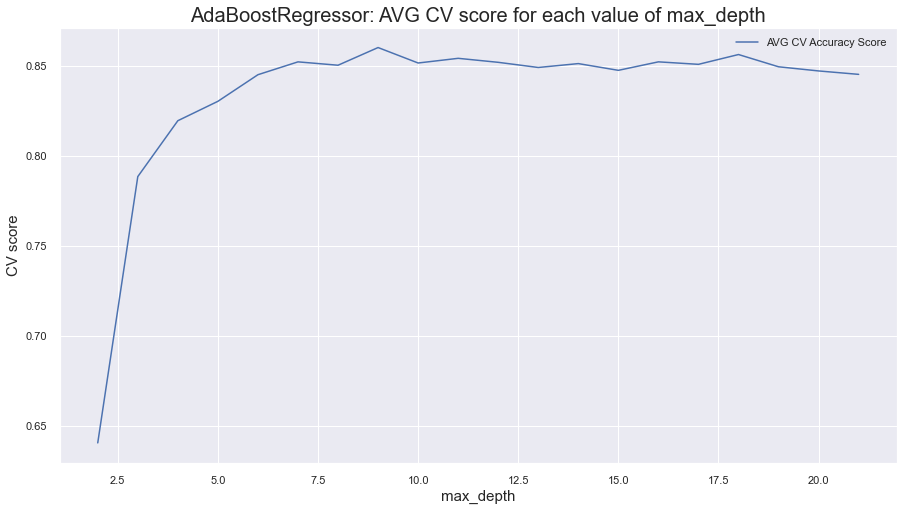

In [185]:
plt.figure(figsize = (15,8)) 
plt.plot(max_depth_param_list, np.mean(np.array(score_results_ab), axis = 1), label = "AVG CV Accuracy Score")
plt.title("AdaBoostRegressor: AVG CV score for each value of max_depth", fontsize=20)
plt.xlabel("max_depth", fontsize=15)
plt.ylabel("CV score", fontsize=15)

plt.legend()
plt.show()

In [186]:
ab_avg_cv_scores = np.mean(np.array(score_results_ab), axis = 1)
ab_max_avg_accuracy_index = np.argmax(ab_avg_cv_scores) 
print("Optimal max_depth value using CV: %s" % max_depth_param_list[ab_max_avg_accuracy_index]) 

Optimal max_depth value using CV: 9


In [187]:
mod_ab_reg = AdaBoostRegressor(tree.DecisionTreeRegressor(max_depth = max_depth_param_list[
    ab_max_avg_accuracy_index]), n_estimators = 500, learning_rate = 1)
mod_ab_reg_fit = mod_ab_reg.fit(X_train,y_train)
model_ab_score = mod_ab_reg_fit.score(X_test,y_test)
print("Model Score on test set: %s" % model_ab_score)

Model Score on test set: 0.84823201193482


### Feature importance for the AdaBoost 

In [188]:
imp = pd.DataFrame()
imp["importance"] = mod_ab_reg_fit.feature_importances_
imp["col_name"] = np.transpose(X.columns)

In [189]:
imp.sort_values("importance", ascending=False).head(15)

importance                   col_name
36    0.198532            w_avg_education
39    0.158646                 race_asian
46    0.125325           median_rent_paid
4     0.088765  medianhouseholdincome2020
11    0.060820                    density
49    0.052226             total_env_loss
24    0.036365    income_household_median
50    0.032565                   state_TX
37    0.030789      education_stem_degree
8     0.025844          avglifeexpectancy
31    0.024165  income_household_35_to_50
2     0.012791          0_17_poverty_perc
7     0.010754              change2020-21
43    0.009231              race_multiple
41    0.008704               race_pacific

Text(0, 0.5, 'Importance')

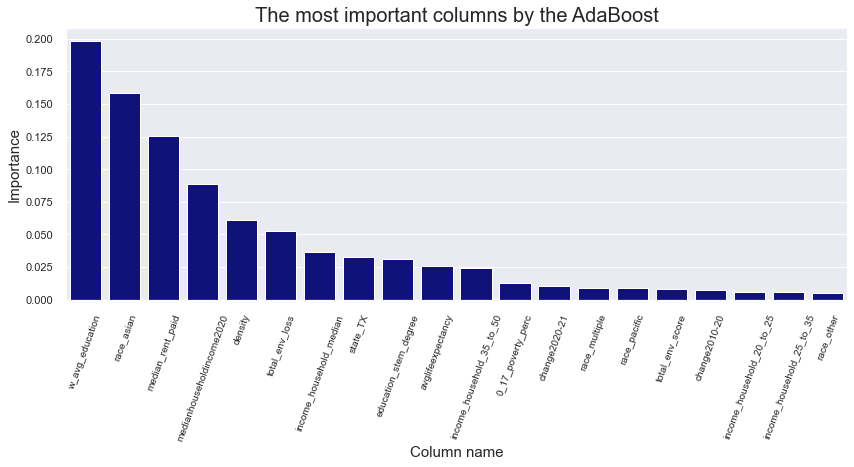

In [190]:
important_top_20 = imp.sort_values("importance", ascending=False).head(20)

sns.set(rc={'figure.figsize':(14,5)})
sns.barplot(x="col_name", y="importance", data=important_top_20, 
            color="darkblue").set_title("The most important columns by the AdaBoost",fontsize=20)
plt.xticks(rotation=70, size=10)
plt.xlabel("Column name",fontsize=15)
plt.ylabel("Importance",fontsize=15)


## General Results

In [191]:
print("1. Decision Tree: Model Score on test set: %s" % round(model_dt_score,4))
print("2. Random Forest: Model Score on test set: %s" % round(model_rf_score,4))
print("3. AdaBoost: Model Score on test set: %s" % round(model_ab_score,4))

1. Decision Tree: Model Score on test set: 0.5497
2. Random Forest: Model Score on test set: 0.8586
3. AdaBoost: Model Score on test set: 0.8482


In [192]:
print("The max value is",max(model_dt_score, model_rf_score, model_ab_score))

The max value is 0.8586359656600255


In [193]:
X.head(2)

const  allpoverty_perc  0_17_poverty_perc  unemployement_21  \
0    1.0              8.6                9.1               6.1   
1    1.0             14.3               24.5               8.1   

   medianhouseholdincome2020  pop2021  change2010-20  change2020-21  \
0                     113518  1648556          10.23          -2.01   
1                      64542     1235           2.41           2.57   

   avglifeexpectancy      area  ...  state_TX  state_WA  \
0              80.85  737.4768  ...         0         0   
1              80.40  738.3400  ...         0         0   

   risk_ratng_RelativelyLow  risk_ratng_RelativelyModerate  \
0                         0                              0   
1                         1                              0   

   risk_ratng_VeryHigh  risk_ratng_VeryLow  expannualloss_ratng_RelativelyLow  \
0                    0                   0                                  0   
1                    0                   0                                  1   

   expannualloss_ratng_RelativelyModerate  expannualloss_ratng_VeryHigh  \
0                                       0                             1   
1                                       0                             0   

   expannualloss_ratng_VeryLow  
0                            0  
1                            0  

[2 rows x 60 columns]

In [194]:
X.columns

Index(['const', 'allpoverty_perc', '0_17_poverty_perc', 'unemployement_21',
       'medianhouseholdincome2020', 'pop2021', 'change2010-20',
       'change2020-21', 'avglifeexpectancy', 'area',
       'socialvulnerability_score', 'density', 'age_median', 'age_under_10',
       'age_10_to_19', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_70s',
       'age_over_80', 'female', 'family_size', 'family_dual_income',
       'income_household_median', 'income_household_under_5',
       'income_household_5_to_10', 'income_household_10_to_15',
       'income_household_15_to_20', 'income_household_20_to_25',
       'income_household_25_to_35', 'income_household_35_to_50',
       'income_household_50_to_75', 'income_household_75_to_100',
       'home_ownership', 'rent_burden', 'w_avg_education',
       'education_stem_degree', 'race_black', 'race_asian', 'race_native',
       'race_pacific', 'race_other', 'race_multiple', 'hispanic', 'disabled',
       'median_rent_paid', 'metro', 'total_env_sc

## K-means clustering

In [195]:
data2 = data

In [196]:
data2.columns

Index(['name', 'state', 'allpoverty_perc', '0_17_poverty_perc',
       'unemployement_21', 'medianhouseholdincome2020', 'pop2021',
       'change2010-20', 'change2020-21', 'avglifeexpectancy', 'area',
       'risk_ratng', 'expannualloss_ratng', 'socialvulnerability_score',
       'socialvulnerability_ratng', 'density', 'age_median', 'age_under_10',
       'age_10_to_19', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s',
       'age_70s', 'age_over_80', 'male', 'female', 'family_size',
       'family_dual_income', 'income_household_median',
       'income_household_under_5', 'income_household_5_to_10',
       'income_household_10_to_15', 'income_household_15_to_20',
       'income_household_20_to_25', 'income_household_25_to_35',
       'income_household_35_to_50', 'income_household_50_to_75',
       'income_household_75_to_100', 'income_household_six_figure',
       'home_ownership', 'rent_burden', 'w_avg_education',
       'education_stem_degree', 'race_white', 'race_black', 'rac

In [197]:
data2 = data2.drop(["risk_ratng", "expannualloss_ratng", "age_60s", 
                    "income_household_six_figure", "race_white", "male"], axis=1)

In [198]:
data2 = data2.drop("socialvulnerability_ratng", axis=1)

In [199]:
# for i in range(len(data1.state)):
data2.loc[data2["state"] == "TX", "state"] = 0
data2.loc[data2["state"] == "CA", "state"] = 1
data2.loc[data2["state"] == "WA", "state"] = 2

In [200]:
data2.head(3)

name state  allpoverty_perc  0_17_poverty_perc  unemployement_21  \
0  Alameda     1              8.6                9.1               6.1   
1   Alpine     1             14.3               24.5               8.1   
2   Amador     1             10.3               13.0               7.0   

   medianhouseholdincome2020  pop2021  change2010-20  change2020-21  \
0                     113518  1648556          10.23          -2.01   
1                      64542     1235           2.41           2.57   
2                      68141    41259           5.89           1.94   

   avglifeexpectancy  ...  race_pacific  race_other  race_multiple   hispanic  \
0              80.85  ...       0.72766    9.095745       6.689362  19.582979   
1              80.40  ...       0.30000    5.650000       2.850000  19.600000   
2              79.20  ...       0.08000    3.790000       6.410000  11.850000   

   disabled  median_rent_paid  metro  avg_home_price_2021  total_env_score  \
0   9.42766           33600.9      1            1088290.8       102.834389   
1  10.90000           21609.9      0             469876.1       111.747062   
2  21.18000           20554.3      0             373588.8        53.969696   

   total_env_loss  
0      150.468150  
1      114.225055  
2       62.007237  

[3 rows x 52 columns]

In [201]:
data2.state = pd.to_numeric(data2.state, downcast='signed')

In [202]:
cl_data = data2.iloc[:, 1:]

In [203]:
cl_data.head()

state  allpoverty_perc  0_17_poverty_perc  unemployement_21  \
0      1              8.6                9.1               6.1   
1      1             14.3               24.5               8.1   
2      1             10.3               13.0               7.0   
3      1             17.3               18.7               6.9   
4      1             11.6               16.1               5.7   

   medianhouseholdincome2020  pop2021  change2010-20  change2020-21  \
0                     113518  1648556          10.23          -2.01   
1                      64542     1235           2.41           2.57   
2                      68141    41259           5.89           1.94   
3                      54718   208309          -3.95          -1.57   
4                      66329    46221          -0.63           2.05   

   avglifeexpectancy       area  ...  race_pacific  race_other  race_multiple  \
0              80.85   737.4768  ...      0.727660    9.095745       6.689362   
1              80.40   738.3400  ...      0.300000    5.650000       2.850000   
2              79.20   594.5714  ...      0.080000    3.790000       6.410000   
3              77.70  1636.4690  ...      0.153846    5.238462       7.792308   
4              80.83  1020.0160  ...      0.066667    1.400000       3.833333   

    hispanic   disabled  median_rent_paid  metro  avg_home_price_2021  \
0  19.582979   9.427660           33600.9      1            1088290.8   
1  19.600000  10.900000           21609.9      0             469876.1   
2  11.850000  21.180000           20554.3      0             373588.8   
3  18.530769  20.084615           17985.0      1             374435.5   
4  11.053333  20.646667           23917.9      0             427349.3   

   total_env_score  total_env_loss  
0       102.834389      150.468150  
1       111.747062      114.225055  
2        53.969696       62.007237  
3       139.704050      126.444980  
4        95.285525      110.732992  

[5 rows x 51 columns]

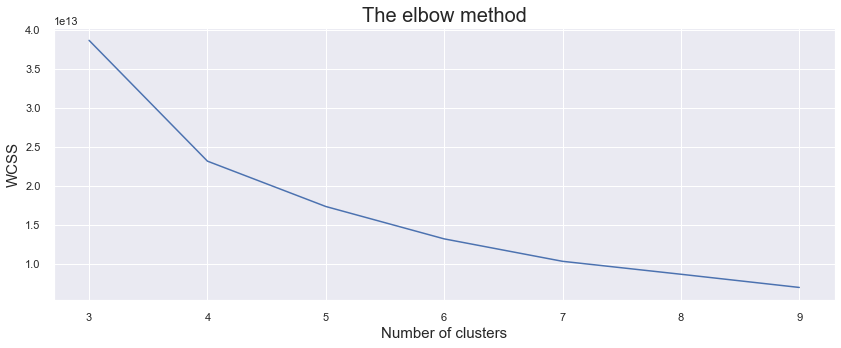

In [204]:
wcss = []
for i in range(3, 10):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(cl_data)
    wcss.append(kmeans.inertia_)
    
    
plt.plot(range(3, 10), wcss)
plt.title('The elbow method', fontsize=20)
plt.xlabel('Number of clusters', fontsize=15)
plt.ylabel('WCSS', fontsize=15) 
plt.show()

https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad

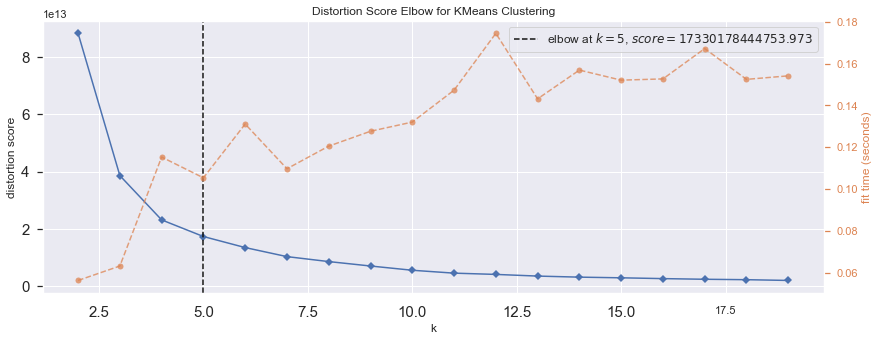

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [205]:
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,20), timings= True)
visualizer.fit(cl_data)        # Fit data to visualizer

for xtick,ytick in zip(visualizer.ax.xaxis.get_major_ticks(),visualizer.ax.yaxis.get_major_ticks()):
    xtick.label.set_fontsize(15) 
    ytick.label.set_fontsize(15)
    

visualizer.show()   

visualizer.show()        # Finalize and render figure


In [206]:
km = KMeans(n_clusters=5, random_state=42)

In [207]:
km.fit(cl_data)

KMeans(n_clusters=5, random_state=42)

In [208]:
data['cluster'] = km.labels_

In [209]:
data.head(2)

name state  allpoverty_perc  0_17_poverty_perc  unemployement_21  \
0  Alameda    CA              8.6                9.1               6.1   
1   Alpine    CA             14.3               24.5               8.1   

   medianhouseholdincome2020  pop2021  change2010-20  change2020-21  \
0                     113518  1648556          10.23          -2.01   
1                      64542     1235           2.41           2.57   

   avglifeexpectancy  ...  race_other race_multiple   hispanic  disabled  \
0              80.85  ...    9.095745      6.689362  19.582979   9.42766   
1              80.40  ...    5.650000      2.850000  19.600000  10.90000   

  median_rent_paid  metro  avg_home_price_2021  total_env_score  \
0          33600.9      1            1088290.8       102.834389   
1          21609.9      0             469876.1       111.747062   

   total_env_loss  cluster  
0      150.468150        2  
1      114.225055        0  

[2 rows x 60 columns]

In [210]:
data.groupby(['cluster'],as_index=False).avg_home_price_2021.mean()

cluster  avg_home_price_2021
0        0        216051.145928
1        1        632946.566667
2        2        615919.566667
3        3        765985.900000
4        4        628991.312903

In [211]:
# km.labels_

In [212]:
tsne = TSNE()

In [213]:
proj_data = tsne.fit_transform(cl_data)

In [214]:
data.income_household_median

0      104509.57450
1       69935.00000
2       59950.00000
3       52699.92308
4       61943.33333
           ...     
346     55257.16667
347     65748.50000
348     50251.00000
349     64931.33333
350     32605.33333
Name: income_household_median, Length: 351, dtype: float64

In [215]:
sns.lmplot(x = "avg_home_price_2021", y = "income_household_median", data=data,
           hue = "cluster", fit_reg=False, scatter_kws = {'s':25}, aspect = 2, palette=pal)
plt.title("Median Household Income and Average Home Price with Clusters", fontsize=20)
plt.xlabel("Average Home Price",fontsize=15)
plt.ylabel("Median Household Income",fontsize=15)

plt.show()

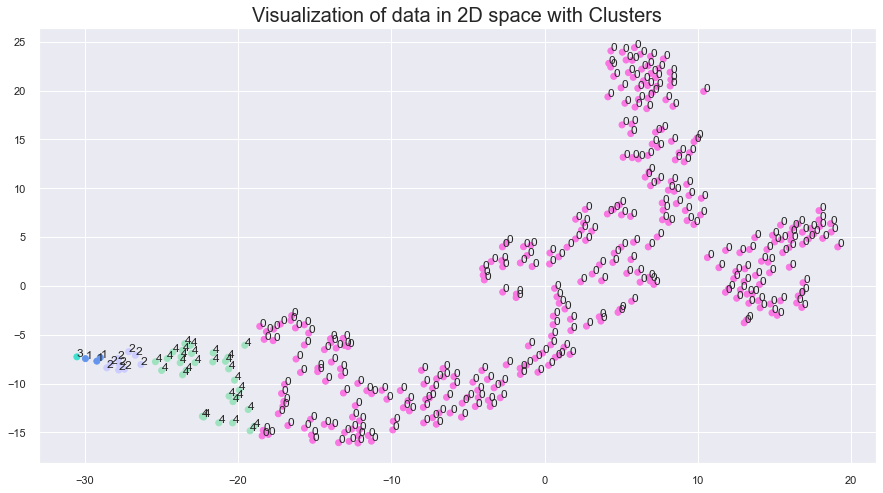

In [216]:
plt.figure(figsize = (15,8))
    
colormap = np.array(['#f976e3', "#6495ED", "#CCCCFF", "#40E0D0", "#9FE2BF"])
 
# depict illustration
plt.scatter(proj_data[:, 0], proj_data[:, 1], c=colormap[km.labels_])

for i, label in enumerate(km.labels_):
    plt.annotate(label, (proj_data[i, 0], proj_data[i, 1]))
plt.title("Visualization of data in 2D space with Clusters", fontsize=20)

plt.show()

In [217]:
sorted(data.cluster.unique())

[0, 1, 2, 3, 4]

In [218]:
for i in sorted(data.cluster.unique()): 
    print(i,"has", len(data[data.cluster == i]), "counties")

0 has 307 counties
1 has 3 counties
2 has 9 counties
3 has 1 counties
4 has 31 counties


In [219]:
data[data.cluster == 3][["name", "state"]]

name state
18  LosAngeles    CA

In [220]:
data[data.cluster == 1][["name", "state"]]

name state
29     Orange    CA
36   SanDiego    CA
197    Harris    TX

In [221]:
for i in sorted(data.cluster.unique()): 
    print(i, "th cluster has", len(data[data.cluster == i]), "values. It contains following counties:")
    print(data[data.cluster == i][["name","state"]])
    print("-----------------")

0 th cluster has 307 values. It contains following counties:
          name state
1       Alpine    CA
2       Amador    CA
3        Butte    CA
4    Calaveras    CA
5       Colusa    CA
..         ...   ...
346       Wood    TX
347     Yoakum    TX
348      Young    TX
349     Zapata    TX
350     Zavala    TX

[307 rows x 2 columns]
-----------------
1 th cluster has 3 values. It contains following counties:
         name state
29     Orange    CA
36   SanDiego    CA
197    Harris    TX
-----------------
2 th cluster has 9 values. It contains following counties:
              name state
0          Alameda    CA
32       Riverside    CA
33      Sacramento    CA
35   SanBernardino    CA
42      SantaClara    CA
74            King    WA
111          Bexar    TX
153         Dallas    TX
316        Tarrant    TX
-----------------
3 th cluster has 1 values. It contains following counties:
          name state
18  LosAngeles    CA
-----------------
4 th cluster has 31 values. It contains fo

<Figure size 1296x1080 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


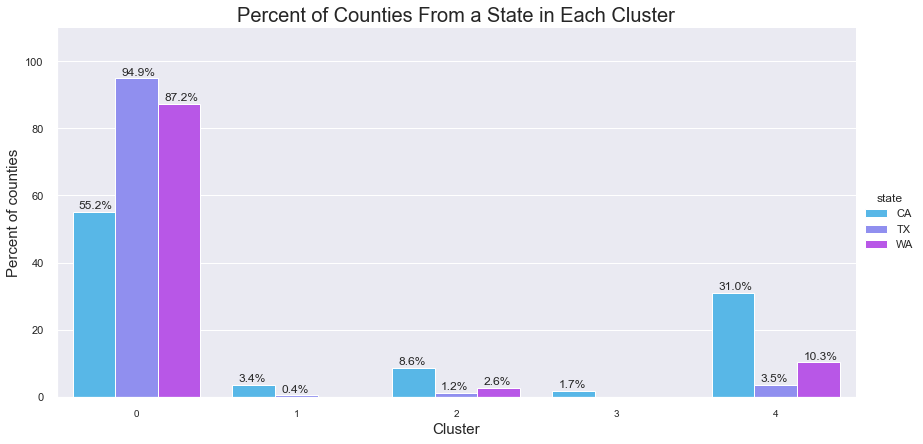

In [222]:
x,y = 'state', 'cluster'

df1 = data.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

plt.figure(figsize=(18,15))
g = sns.catplot(x=y,y='percent',hue=x,kind='bar',data=df1, palette = pal, height=6, aspect=2)
g.ax.set_ylim(0,110)
plt.title("Percent of Counties From a State in Each Cluster", fontsize=20)
plt.xticks(size=10)
plt.xlabel("Cluster",fontsize=15)
plt.ylabel("Percent of counties",fontsize=15)

for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()+0.04 
    txt_y = p.get_height()+1
    g.ax.text(txt_x,txt_y,txt)

### Thanks for your attention!
